## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
            
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Analysis

## Step 1: Data Sourcing

In [2]:
loan = pd.read_csv('loan.csv')

In [3]:
loan.shape

(39717, 111)

## Step 2: Data Cleaning

### Step 2.1: Fixing rows and columns

In [4]:
# Deleting the columns which only has NA values
for col in loan.columns:
    if loan[col].isna().sum()==39717:
        del loan[col]

In [5]:
loan.shape

(39717, 57)

In [6]:
# Deleting the columns which has only 1 value throughout, as this will not give any insights
for col in loan.columns:
    if loan[col].nunique()==1:
        del loan[col]

In [7]:
loan.shape

(39717, 48)

In [8]:
# Removing the free text columns which has too many values and are not useful for analysis - url, desc, title, emp_title
loan.drop('title',axis=1, inplace=True)
loan.drop('emp_title',axis=1, inplace=True)
loan.drop('url',axis=1, inplace=True)
loan.drop('desc',axis=1, inplace=True)

In [9]:
loan.shape

(39717, 44)

In [10]:
loan.nunique()

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
purpose                       14
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
mths_since_last_delinq        95
mths_since_last_record       111
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util                  1089
total_acc                     82
out_prncp 

### Step 2.2 Fix missing values

In [11]:
100*loan.isnull().mean()

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
purpose                     0.000000
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
mths_since_last_delinq     64.662487
mths_since_last_record     92.985372
open_acc                    0.000000
pub_rec                     0.000000
r

In [12]:
# Deleting the columns where high % of values are missing
loan.drop('next_pymnt_d',axis=1, inplace=True) # 97% values are missing
loan.drop('mths_since_last_record',axis=1, inplace=True) # 92% values are missing
loan.drop('mths_since_last_delinq',axis=1, inplace=True) # 64% values are missing

In [13]:
loan.shape

(39717, 41)

In [14]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_length               38642 non-null  object 
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

In [15]:
# Below columns have data only for Fully Paid and Current loan status.
# Hence, these columns can be deleted for the analysis as they have data only when the customer has Chanrged Off.
loan.drop('recoveries',axis=1, inplace=True)
loan.drop('collection_recovery_fee',axis=1, inplace=True)
loan.drop('total_rec_late_fee',axis=1, inplace=True)
loan.drop('out_prncp_inv',axis=1, inplace=True)
loan.drop('out_prncp',axis=1, inplace=True)

### Step 2.3: Standardize values

In [16]:
# Removing the string 'months' under the 'term' column to convert it to integer
loan['term'] = list(map(lambda x:x.replace(" months",""), loan['term']))
loan['term'] = loan['term'].astype('int')

# Removing'%' under the 'int_rate' column to convert it to float
loan['int_rate'] = list(map(lambda x:x.replace("%",""), loan['int_rate']))
loan['int_rate'] = loan['int_rate'].astype('float')

# Removing'%' under the 'revol_util' column to convert it to float.
# As this column has a few null values, above formula will not work.
loan['revol_util'] = loan['revol_util'].apply(lambda x:np.nan if pd.isna(x)else x.replace("%",""))
loan['revol_util'] = loan['revol_util'].astype('float')

# Deriving Metrics

In [17]:
# Deriving month from 'issue_d' column 
loan['month'] = list(map(lambda x:x[0:3], loan['issue_d']))

# Deriving year from 'issue_d' column 
loan['year'] = list(map(lambda x:x[-2:], loan['issue_d']))

In [18]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,month,year
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,May-16,0.0,Dec,11
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,Sep-13,0.0,Dec,11
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,May-16,0.0,Dec,11
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,Apr-16,0.0,Dec,11
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,May-16,0.0,Dec,11


In [19]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term                  39717 non-null  int32  
 6   int_rate              39717 non-null  float64
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   sub_grade             39717 non-null  object 
 10  emp_length            38642 non-null  object 
 11  home_ownership        39717 non-null  object 
 12  annual_inc            39717 non-null  float64
 13  verification_status   39717 non-null  object 
 14  issue_d               39717 non-null  object 
 15  loan_status        

In [20]:
#Categorizing the columns
cat_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','year','month','loan_status','purpose','addr_state','zip_code','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','total_acc','pub_rec_bankruptcies']
num_cols = ['loan_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','revol_bal','revol_util','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_amnt']
other_cols = ['issue_d','last_credit_pull_d','id','member_id','earliest_cr_line', 'last_pymnt_d']

In [21]:
len(cat_cols)+len(num_cols)+len(other_cols)

37

# Step 3: Univariate Analysis

Countplot of Year & Term


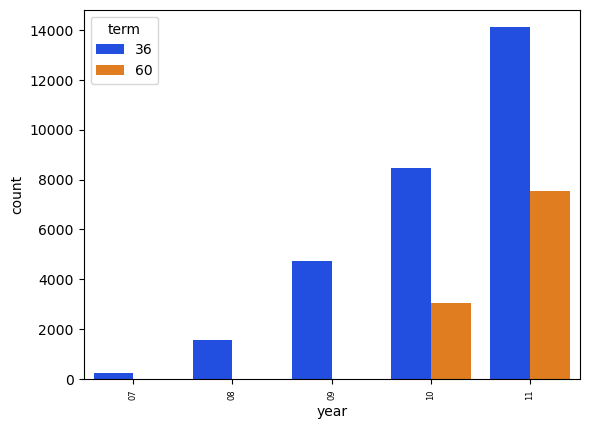

In [22]:
colors = sns.color_palette("bright") 
# Sort unique values of the 'year' column in ascending order
sorted_years = loan['year'].unique()
sorted_years.sort()

print("Countplot of Year & Term")
sns.countplot(x=loan['year'],hue=loan['term'] , palette=colors,order=sorted_years)
plt.xticks(fontsize=6 ,rotation=90)
plt.show()

Countplot of term


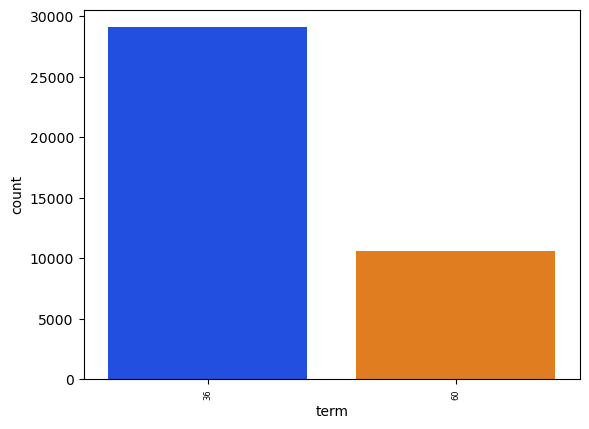

Countplot of grade


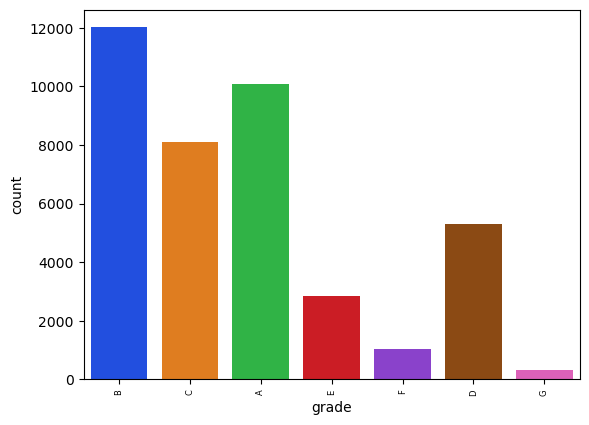

Countplot of sub_grade


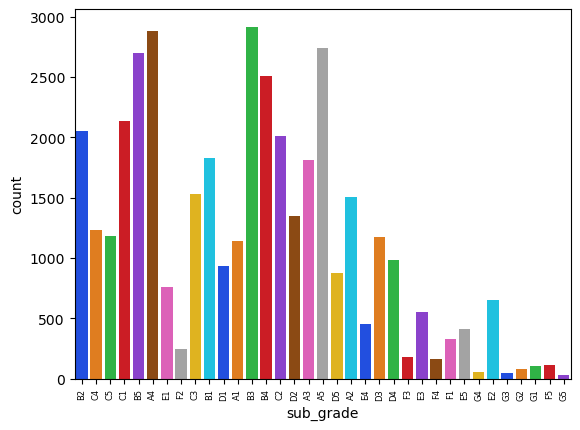

Countplot of emp_length


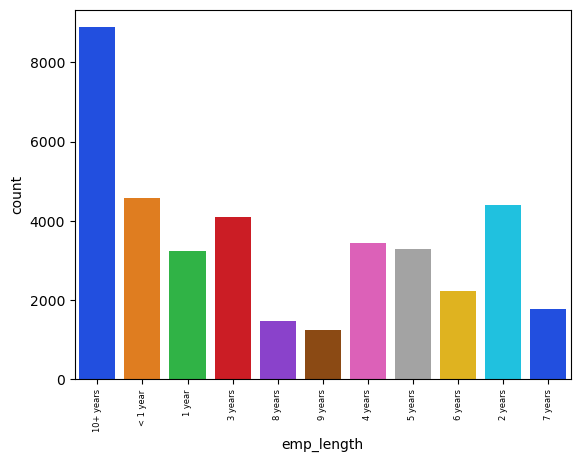

Countplot of home_ownership


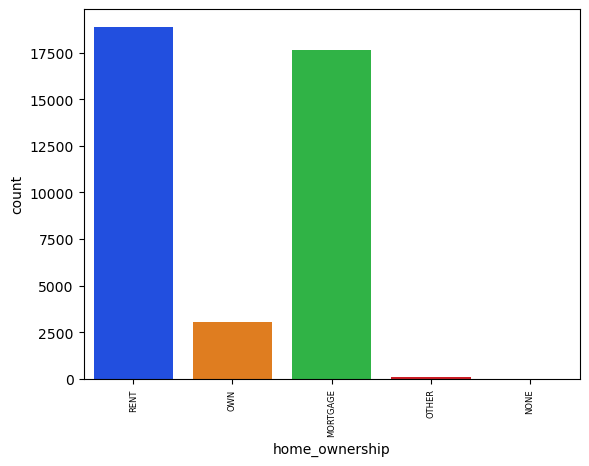

Countplot of verification_status


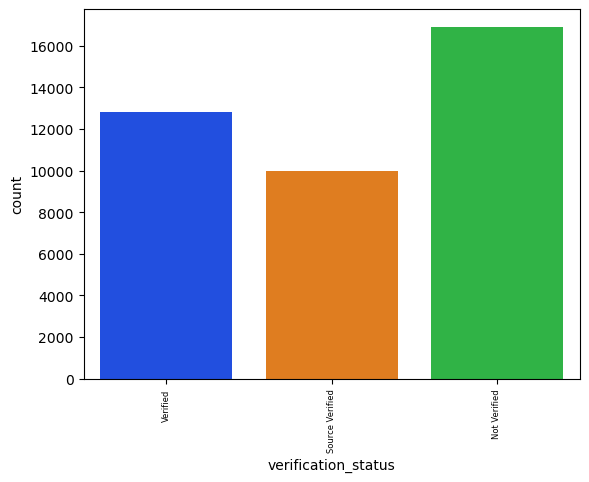

Countplot of year


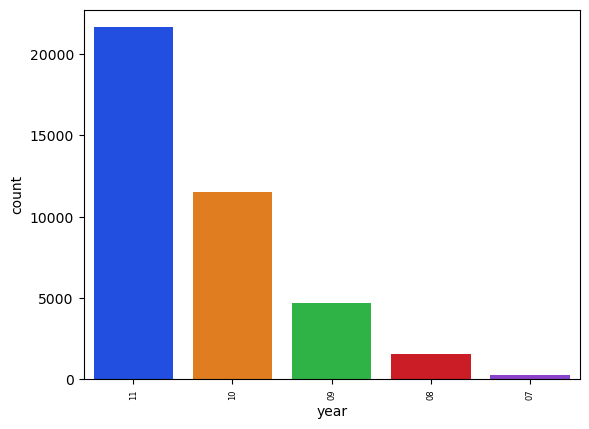

Countplot of month


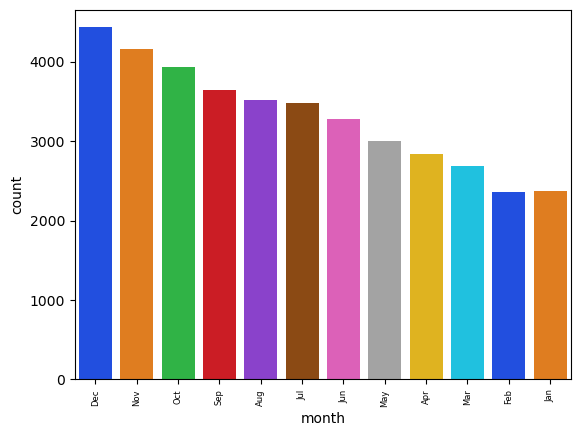

Countplot of loan_status


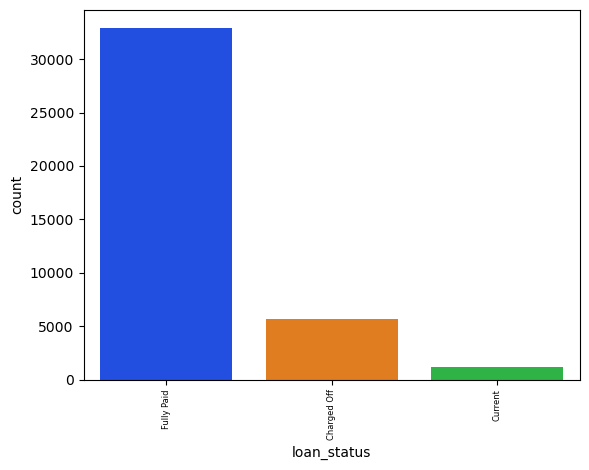

Countplot of purpose


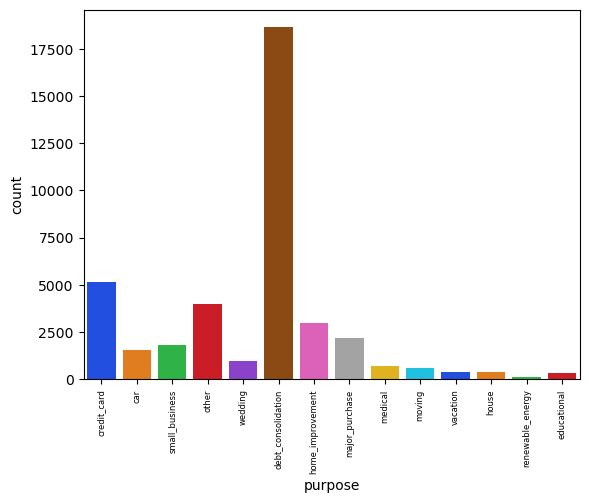

Countplot of addr_state


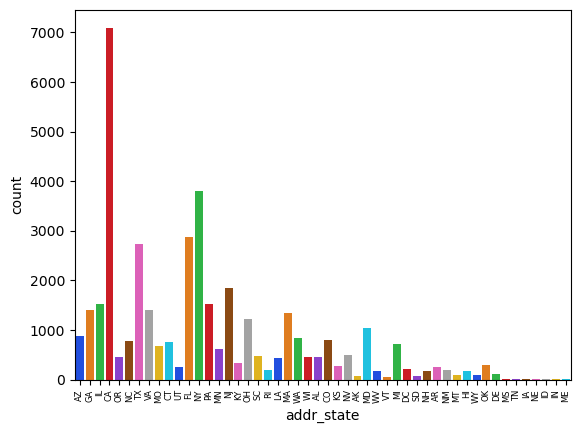

Countplot of zip_code


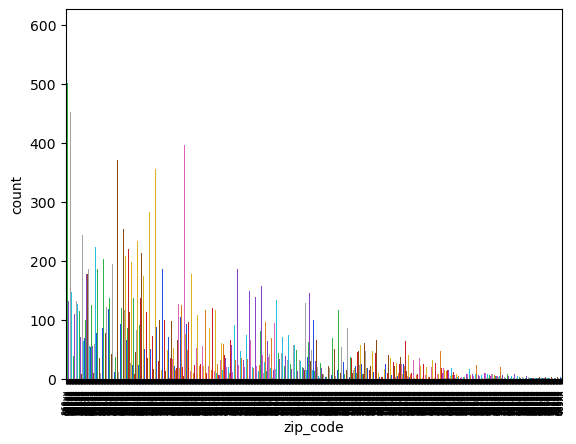

Countplot of delinq_2yrs


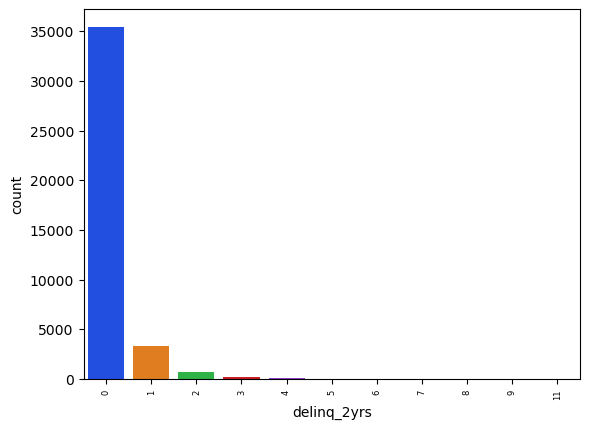

Countplot of inq_last_6mths


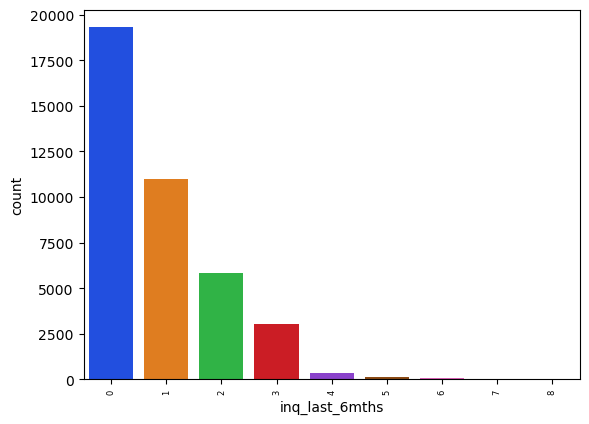

Countplot of open_acc


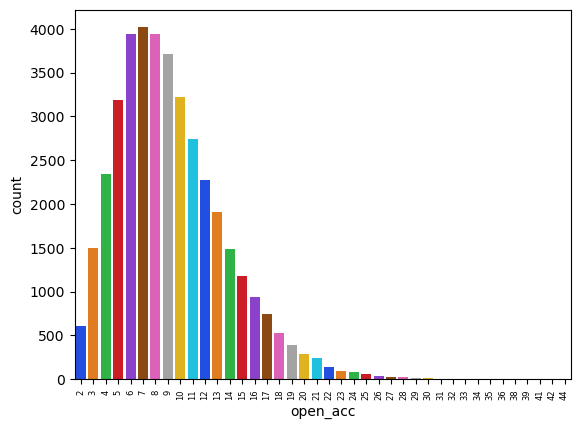

Countplot of pub_rec


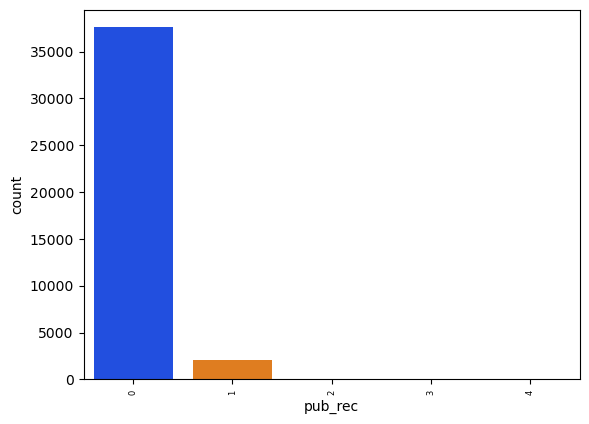

Countplot of total_acc


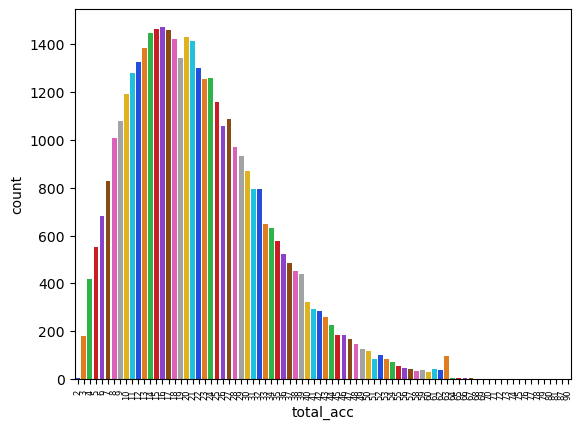

Countplot of pub_rec_bankruptcies


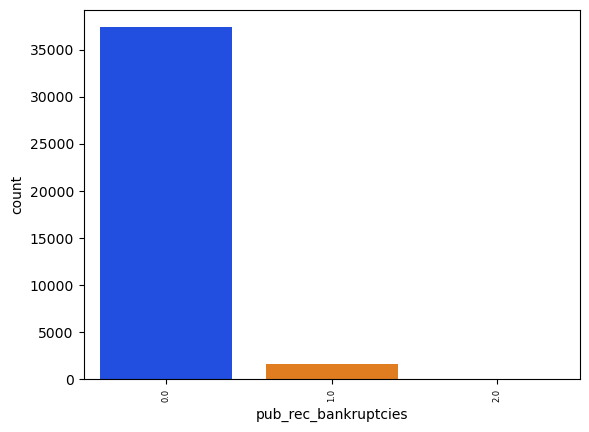

In [23]:
colors = sns.color_palette("bright") 
for i in cat_cols:
    print("Countplot of",i)
    sns.countplot(x=loan[i],palette=colors)
    plt.xticks(fontsize=6 ,rotation=90)
    plt.show()

Pie Chart for  term


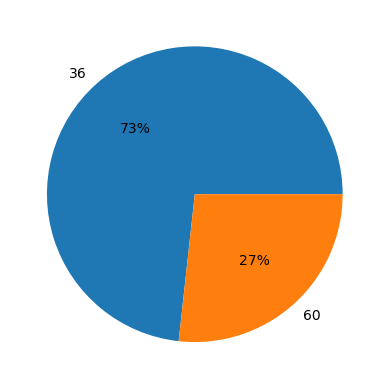

Pie Chart for  grade


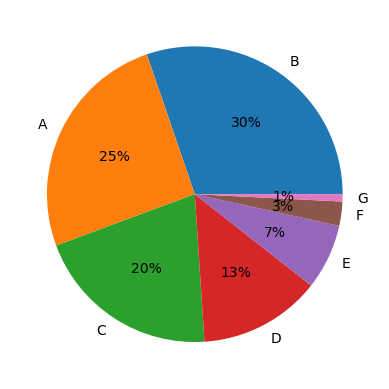

Pie Chart for  sub_grade


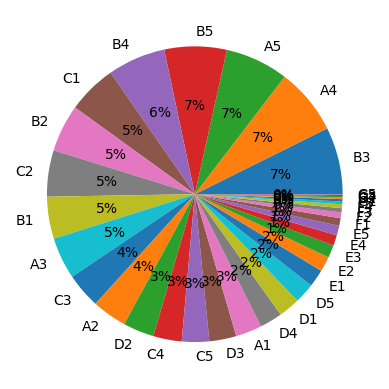

Pie Chart for  emp_length


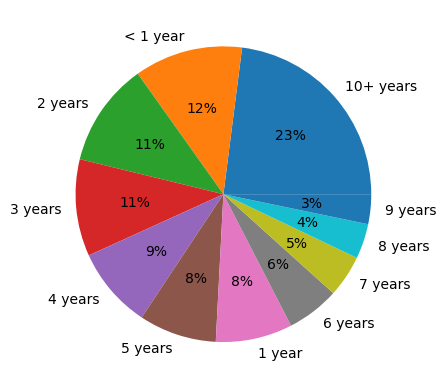

Pie Chart for  home_ownership


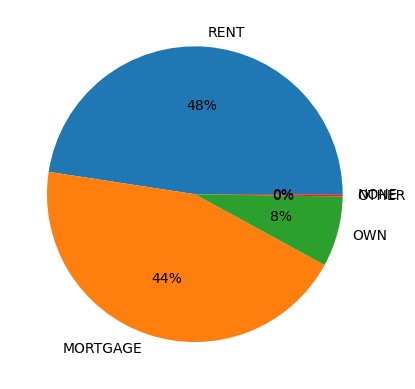

Pie Chart for  verification_status


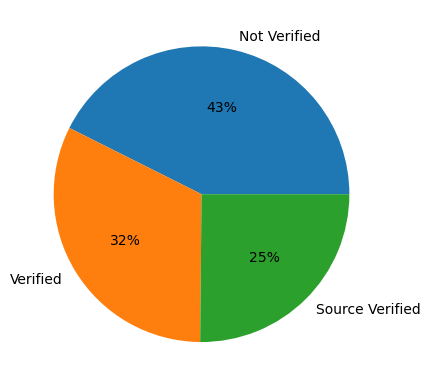

Pie Chart for  year


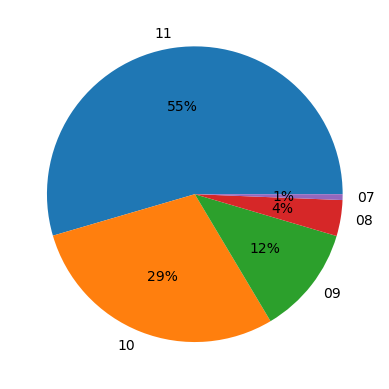

Pie Chart for  month


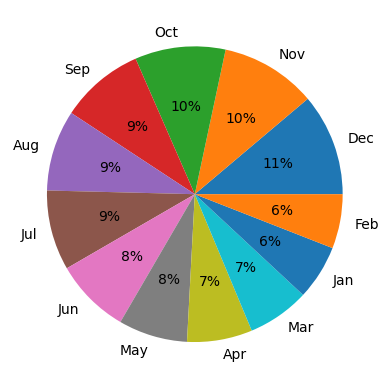

Pie Chart for  loan_status


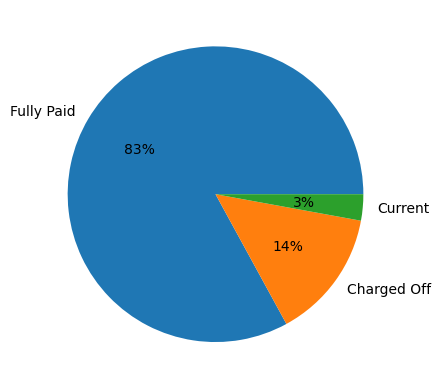

Pie Chart for  purpose


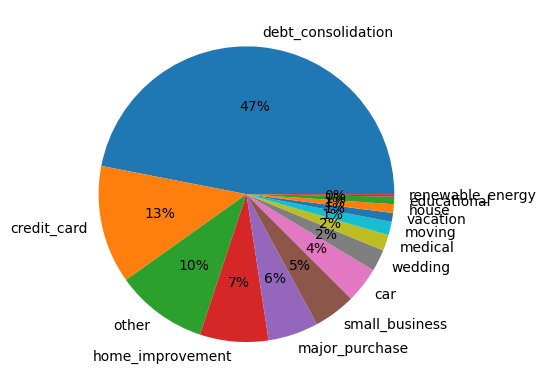

Pie Chart for  addr_state


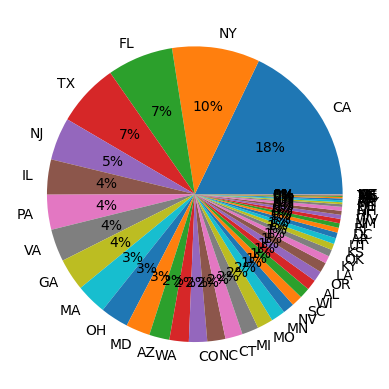

Pie Chart for  zip_code


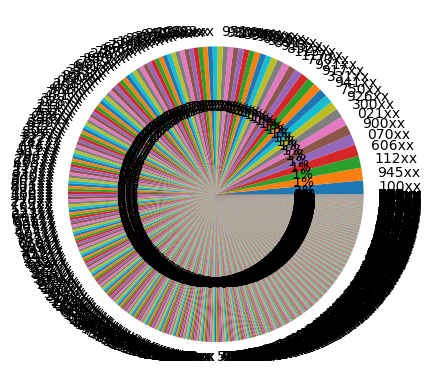

Pie Chart for  delinq_2yrs


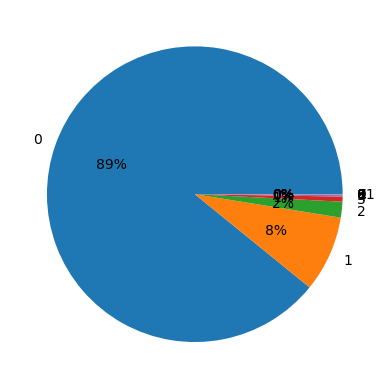

Pie Chart for  inq_last_6mths


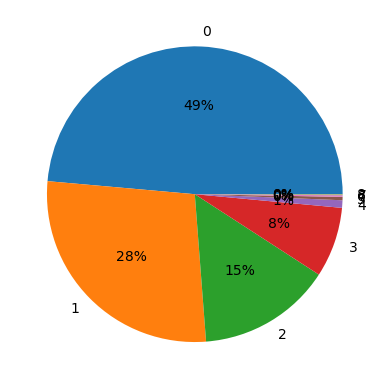

Pie Chart for  open_acc


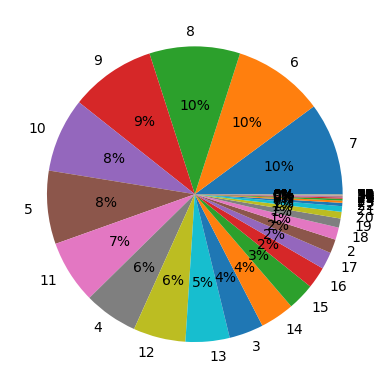

Pie Chart for  pub_rec


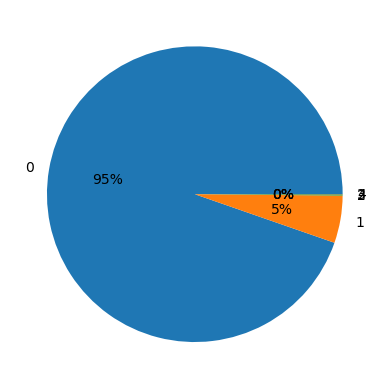

Pie Chart for  total_acc


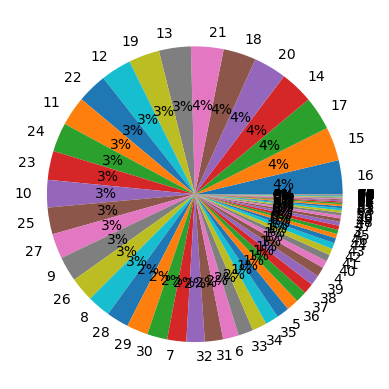

Pie Chart for  pub_rec_bankruptcies


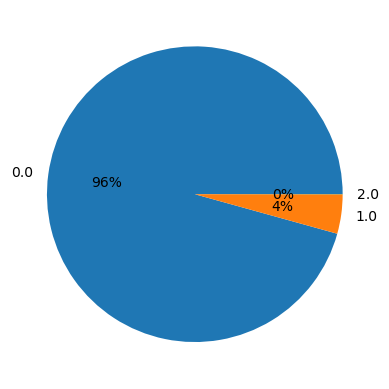

In [24]:
for i in cat_cols:
    print('Pie Chart for ',i)
    y = loan[i].value_counts(normalize=True).values
    names = loan[i].value_counts(normalize=True).index
    plt.pie(y, labels = names, autopct='%1.0f%%')
    plt.show()

### Observation from above plots

##### 1. 73% of people opted for shorter loan term i.e. 36 months
##### 2. 75% loans are awarded with grade A. B and C
##### 3. 23% loan customers are with 10+ years of exp
##### 4. 92% of the loan customers have either rented or mortaged homes
##### 5. 43% of the customers are Not Verified
##### 6. The loan customers have constantly increased from 2007 to 2011
##### 7. 83% have Fully Paid the loand and 14% have Charged off
##### 8. 47% customers give debt consolidation as the purpose of loan
##### 9. 18% customers are from CA and 10% from NY
##### 10. For 89% of the customer delinq_2yrs = 0
##### 11. For 49% of the customer inq_last_6mnths = 0
##### 12. For 95% customer pub_rec is 0 and pub_rec_bankrupcies = 0

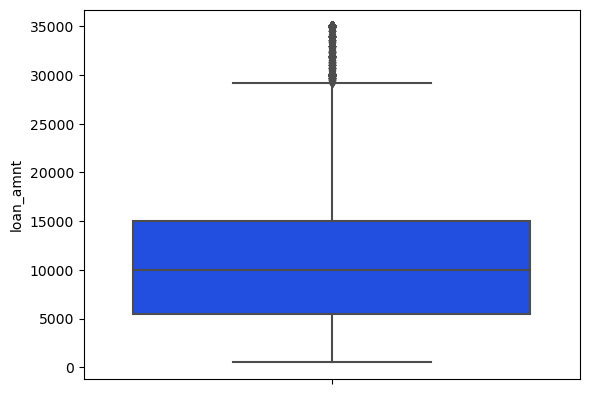

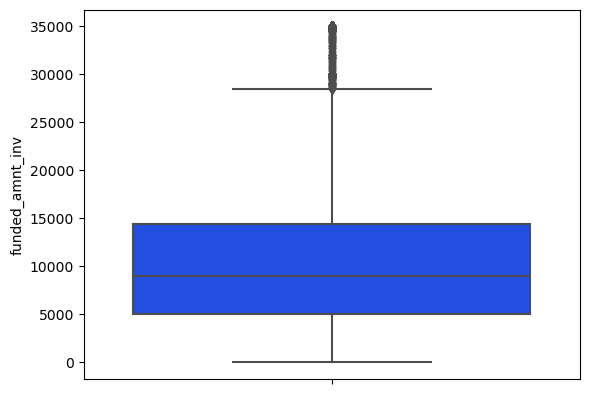

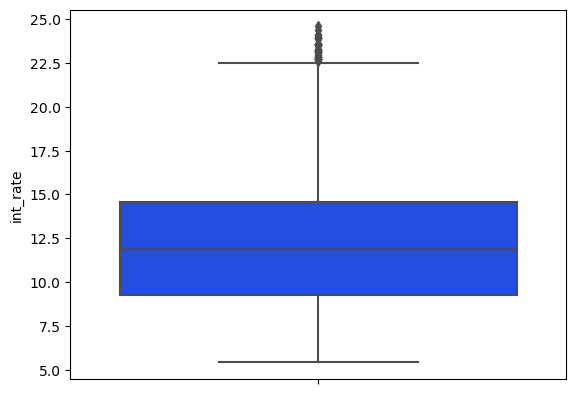

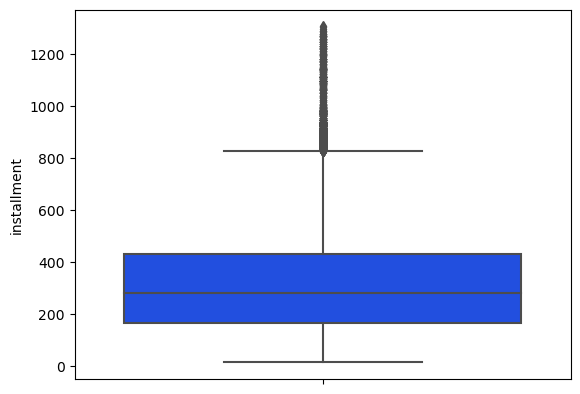

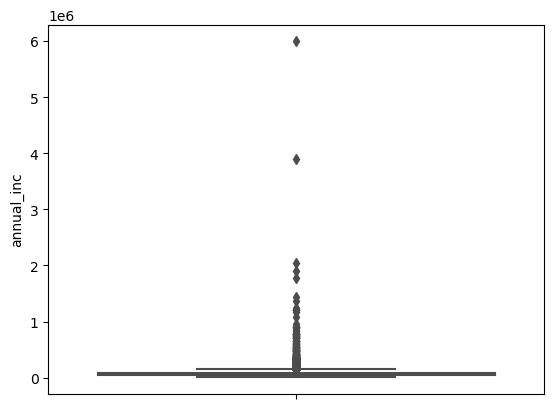

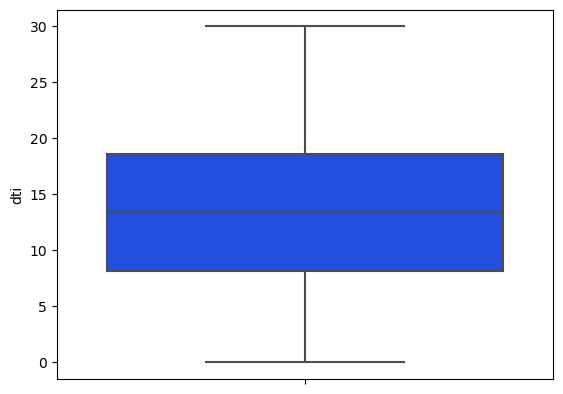

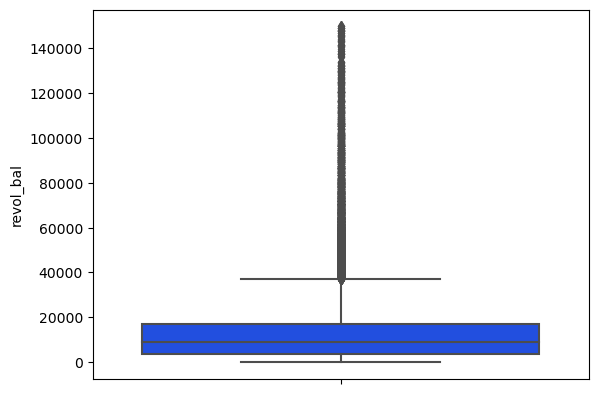

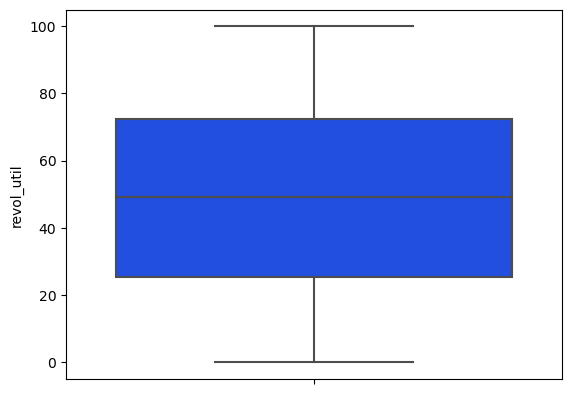

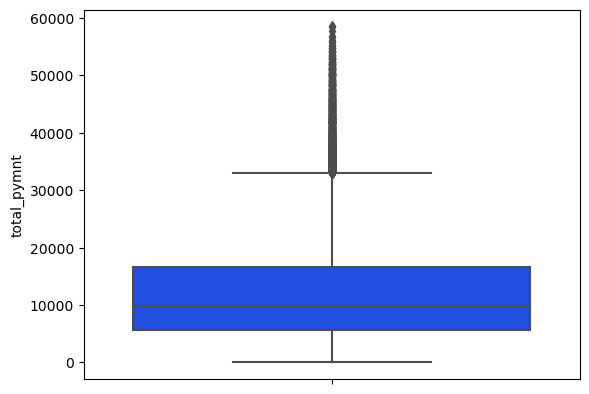

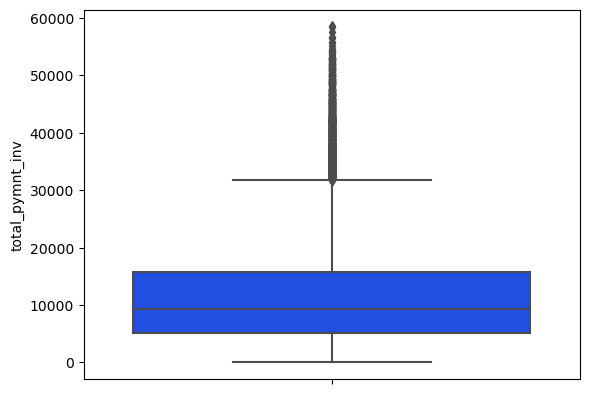

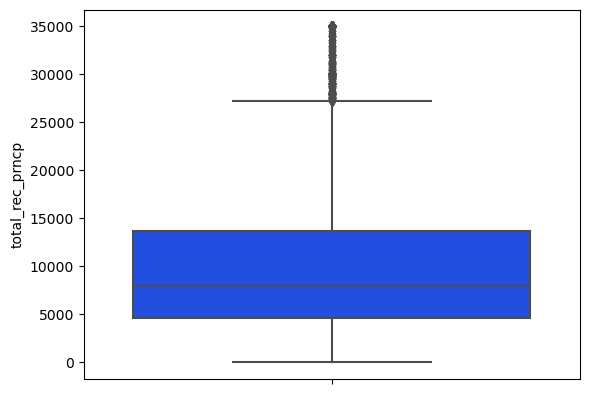

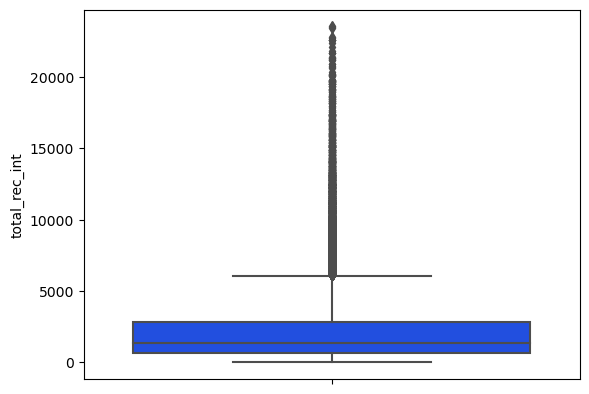

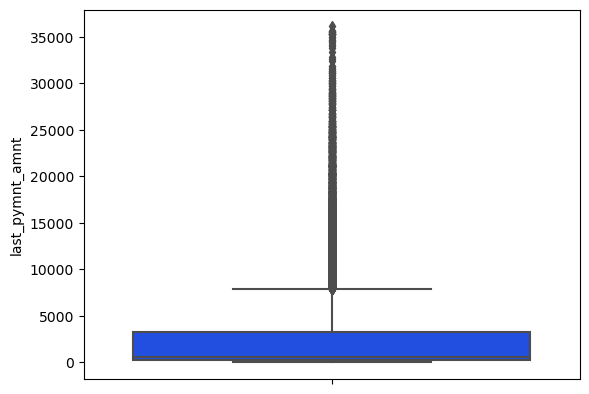

In [25]:
colors = sns.color_palette("bright") 
for i in num_cols:
    sns.boxplot(y=loan[i],palette=colors)
    plt.show()

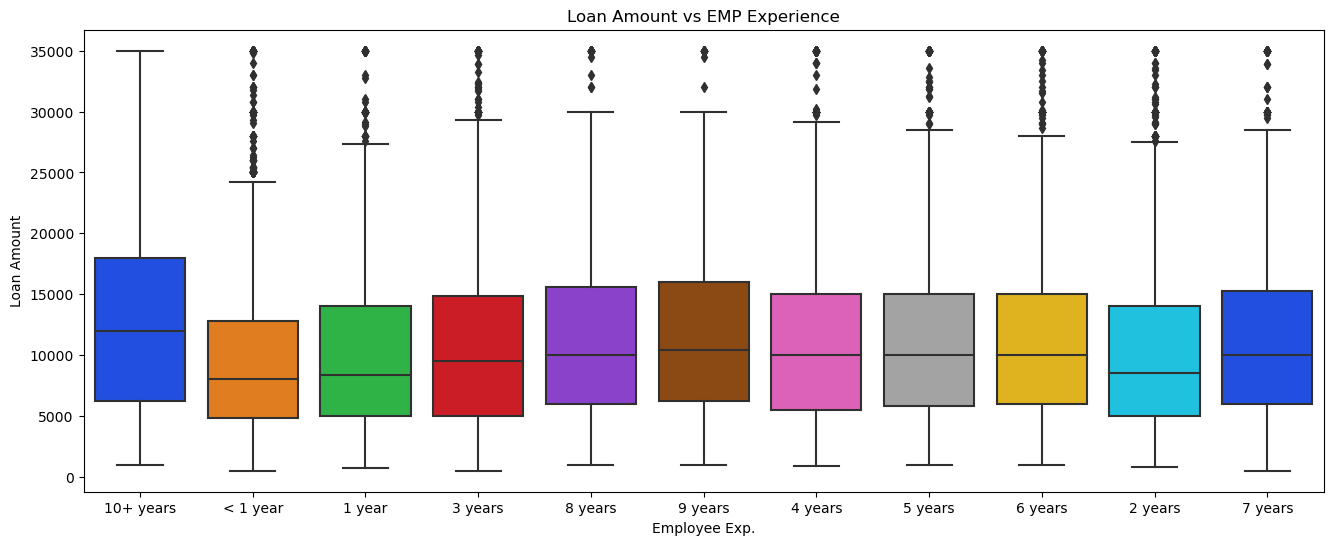

In [26]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x='emp_length',y='loan_amnt',data=loan,palette=colors)
ax.set(xlabel='Employee Exp.', ylabel='Loan Amount',title='Loan Amount vs EMP Experience')
plt.show()

In [27]:
for i in num_cols:
    print("---------- Summary of {} ----------".format(i))
    print(loan[i].describe())

---------- Summary of loan_amnt ----------
count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
---------- Summary of funded_amnt_inv ----------
count    39717.000000
mean     10397.448868
std       7128.450439
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64
---------- Summary of int_rate ----------
count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64
---------- Summary of installment ----------
count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installmen

In [28]:
# Removing the outliers from annual income
loan = loan[loan['annual_inc'] < loan['annual_inc'].quantile(0.99)]

In [29]:
loan.shape

(39319, 38)

# Step 4: Bivarite Analysis

Text(0.5, 1.0, 'Histogram of Employment Length by Loan Status')

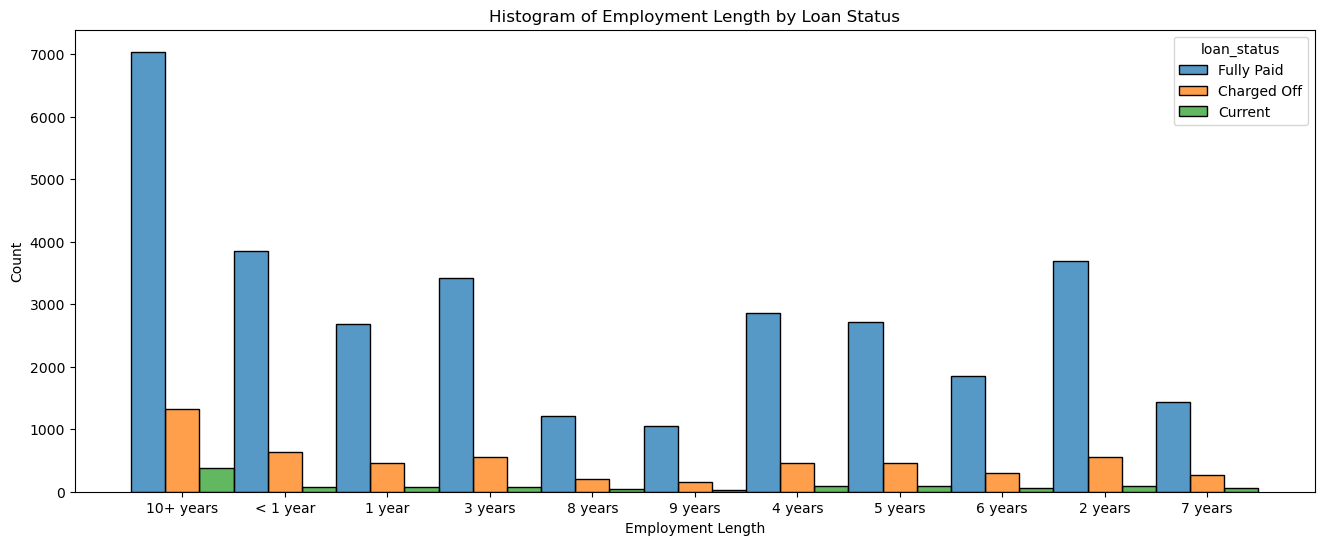

In [30]:
plt.figure(figsize=(16,6))
sns.histplot(data=loan, x='emp_length', hue='loan_status', multiple='dodge')

# Add labels and title
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Histogram of Employment Length by Loan Status')

Text(0.5, 1.0, 'Histogram of Debt to Income ratio by Loan Status')

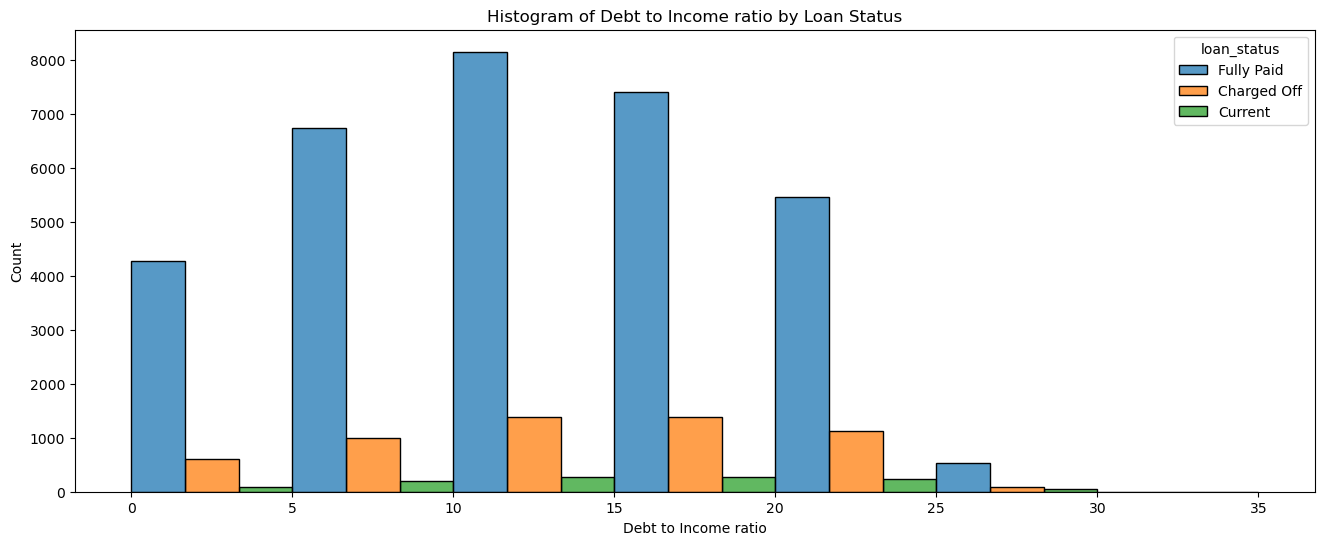

In [31]:
plt.figure(figsize=(16,6))
colors = sns.color_palette("bright") 
sns.histplot(data=loan, x='dti', bins=range(0,40,5), hue='loan_status', multiple='dodge')

# Add labels and title
plt.xlabel('Debt to Income ratio')
plt.ylabel('Count')
plt.title('Histogram of Debt to Income ratio by Loan Status')

Text(0.5, 1.0, 'Histogram of Installment by Loan Status')

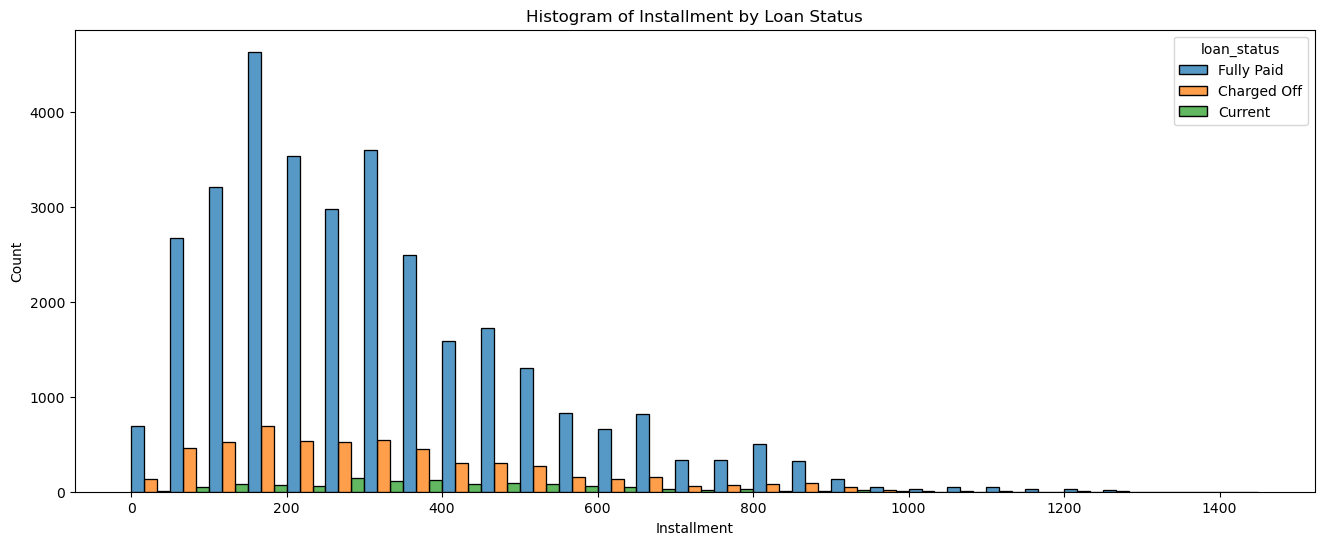

In [32]:
#sns.histplot(x=loan['installment'],bins=range(0,1500,50))
#plt.show()

plt.figure(figsize=(16,6))
colors = sns.color_palette("bright") 
#sns.histplot(x=loan['dti'],bins=range(0,40,5),palette=colors)
sns.histplot(data=loan, x='installment', bins=range(0,1500,50), hue='loan_status', multiple='dodge')

# Add labels and title
plt.xlabel('Installment')
plt.ylabel('Count')
plt.title('Histogram of Installment by Loan Status')

Text(0.5, 1.0, 'Histogram of Annual Income by Loan Status')

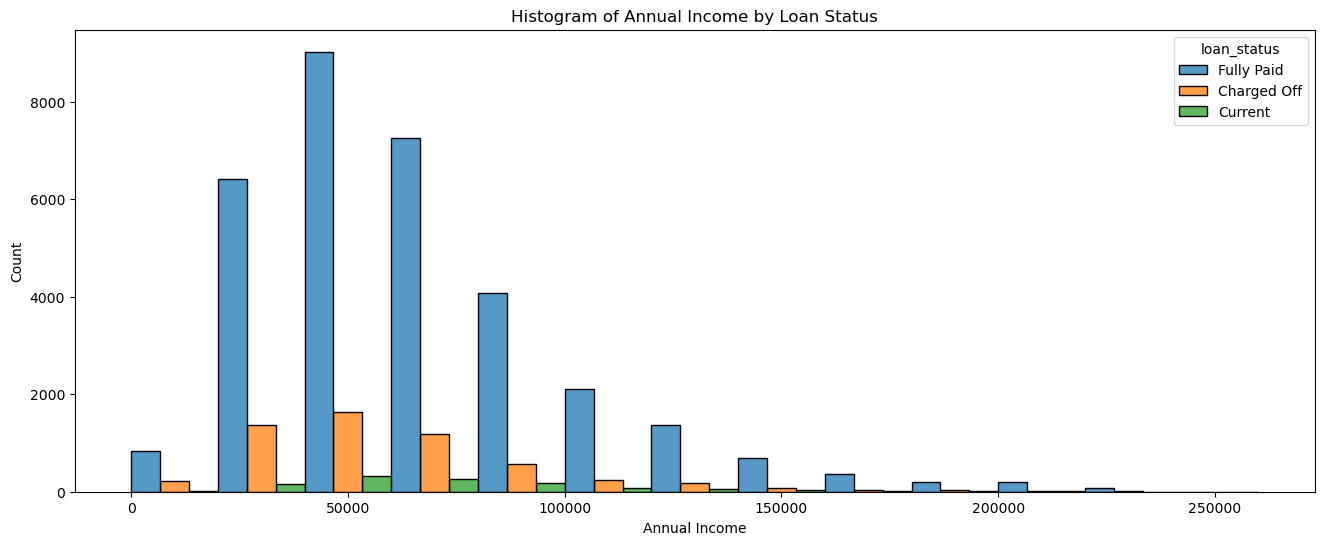

In [33]:
plt.figure(figsize=(16,6))
colors = sns.color_palette("bright") 
sns.histplot(data=loan, x='annual_inc', bins=range(0,280000,20000), hue='loan_status', multiple='dodge')

# Add labels and title
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Histogram of Annual Income by Loan Status')

In [34]:
# Creating bins for numerical columns, to convert them into Categorical columns
loan['annual_inc_cat'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000, 100000, 250000], right=False, labels=['0-20000','20000-40000','40000-60000','60000-80000','80000-100000','100000+'])

Text(0.5, 1.0, 'Histogram of Loan Amount by Loan Status')

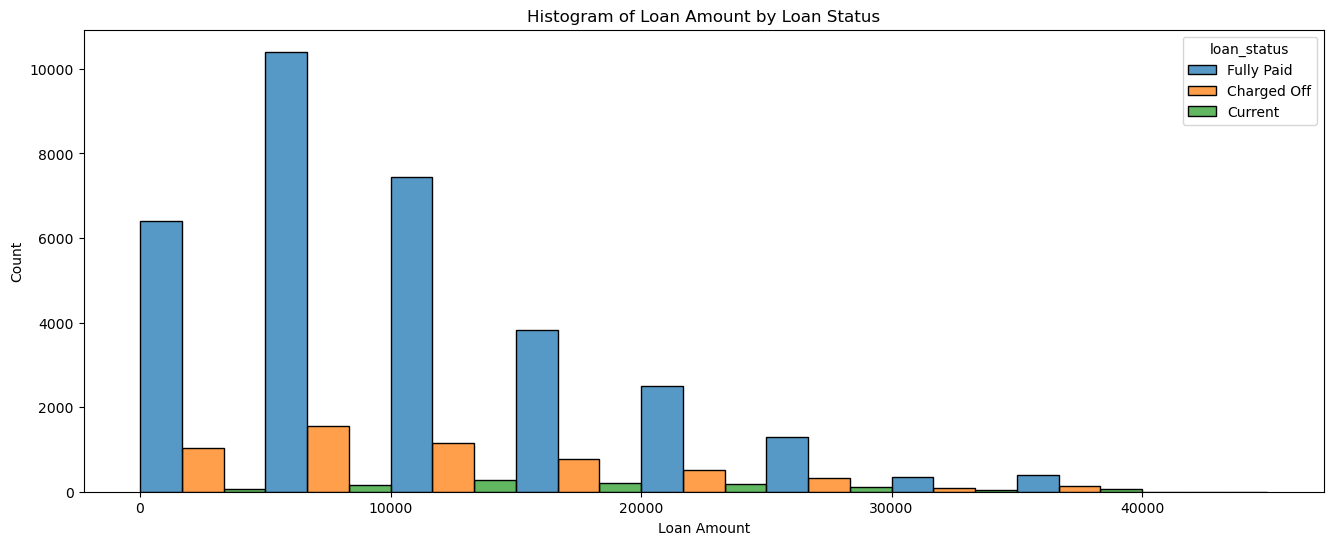

In [35]:
plt.figure(figsize=(16,6))
colors = sns.color_palette("bright") 
sns.histplot(data=loan, x='loan_amnt', bins=range(0,50000,5000), hue='loan_status', multiple='dodge')

# Add labels and title
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Histogram of Loan Amount by Loan Status')

In [36]:
# Creating bins for numerical columns, to convert them into Categorical columns
loan['loan_amnt_cat'] = pd.cut(loan['loan_amnt'], [0, 5000, 10000, 15000, 20000, 25000, 40000], right=False, labels=['0-5000','5000-10000','10000-15000','15000-20000','20000-25000','25000+'])

In [37]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,month,year,annual_inc_cat,loan_amnt_cat
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,5000.00,863.16,Jan-15,171.62,May-16,0.0,Dec,11,20000-40000,5000-10000
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,456.46,435.17,Apr-13,119.66,Sep-13,0.0,Dec,11,20000-40000,0-5000
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,2400.00,605.67,Jun-14,649.91,May-16,0.0,Dec,11,0-20000,0-5000
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,10000.00,2214.92,Jan-15,357.48,Apr-16,0.0,Dec,11,40000-60000,10000-15000
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,2475.94,1037.39,May-16,67.79,May-16,0.0,Dec,11,80000-100000,0-5000


Text(0.5, 1.0, 'Histogram of Interest Rate by Loan Status')

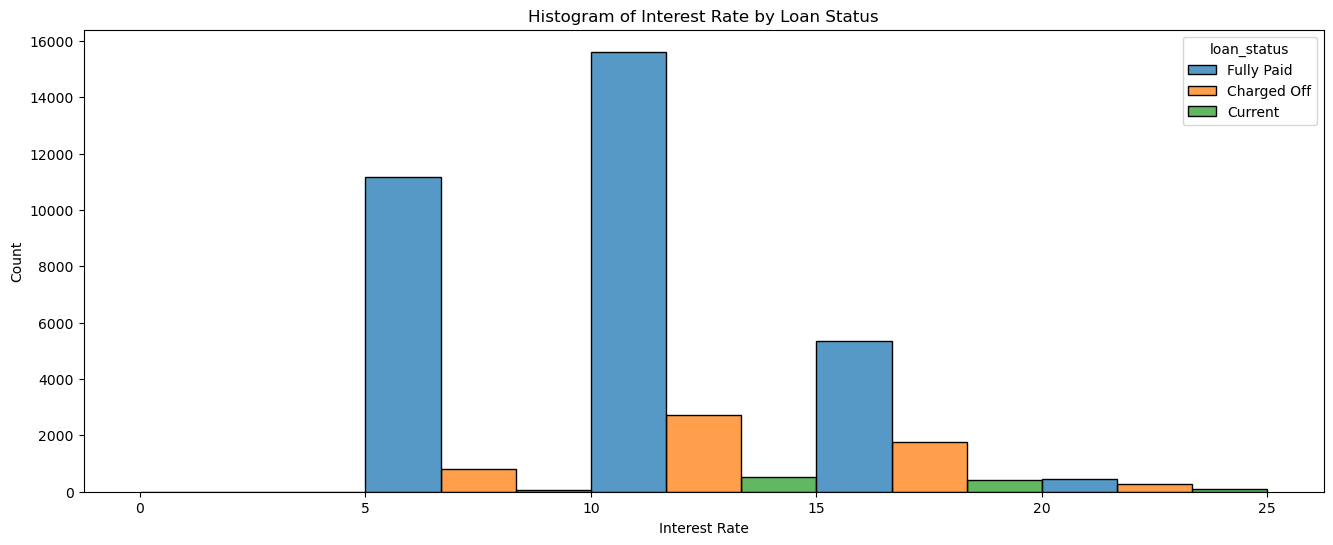

In [38]:
plt.figure(figsize=(16,6))
colors = sns.color_palette("bright") 
sns.histplot(data=loan, x='int_rate', bins=range(0,30,5), hue='loan_status', multiple='dodge')

# Add labels and title
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Histogram of Interest Rate by Loan Status')

In [39]:
# Creating bins for numerical columns, to convert them into Categorical columns
loan['int_rate_cat'] = pd.cut(loan['int_rate'], [5, 10, 15, 20, 25], right=False, labels=['5-10','10-15','15-20','20-25'])

Text(0.5, 1.0, 'Histogram of Debt to Income ratio by Loan Status')

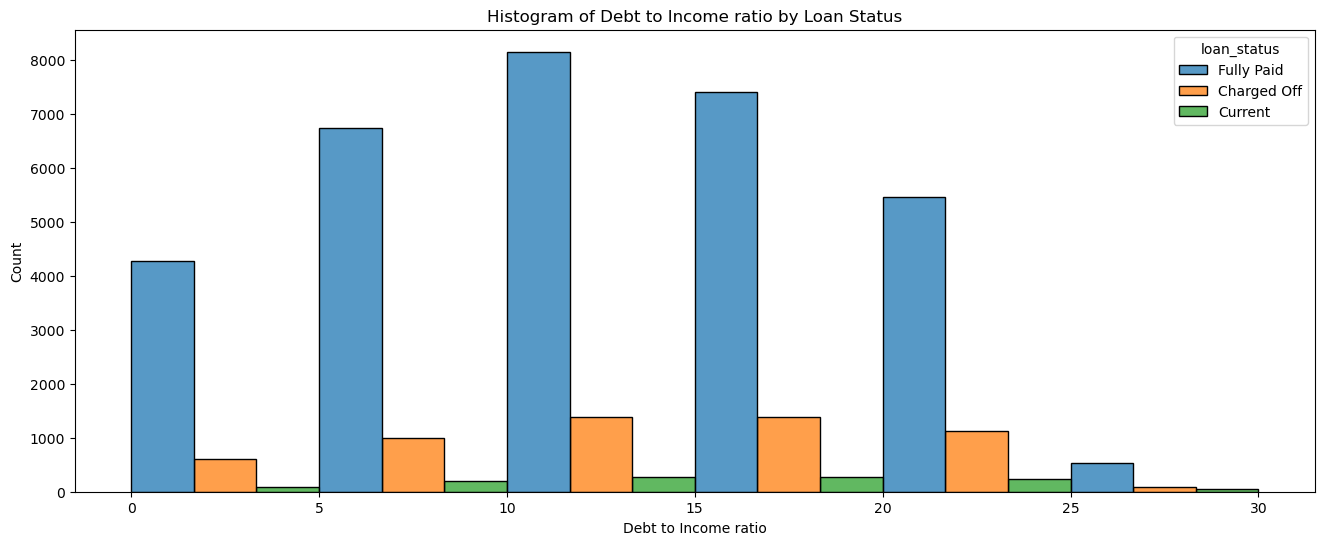

In [40]:
#sns.histplot(x=loan['dti'],bins=range(0,35,5))
#plt.show()


plt.figure(figsize=(16,6))
colors = sns.color_palette("bright") 
sns.histplot(data=loan, x='dti', bins=range(0,35,5), hue='loan_status', multiple='dodge')

# Add labels and title
plt.xlabel('Debt to Income ratio')
plt.ylabel('Count')
plt.title('Histogram of Debt to Income ratio by Loan Status')

In [41]:
loan['dti_cat'] = pd.cut(loan['dti'], [0, 5, 10, 15, 20, 25], right=False, labels=['0-5','5-10','10-15','15-20','20+'])

Text(0.5, 1.0, 'Histogram of Home Ownership by Loan Status')

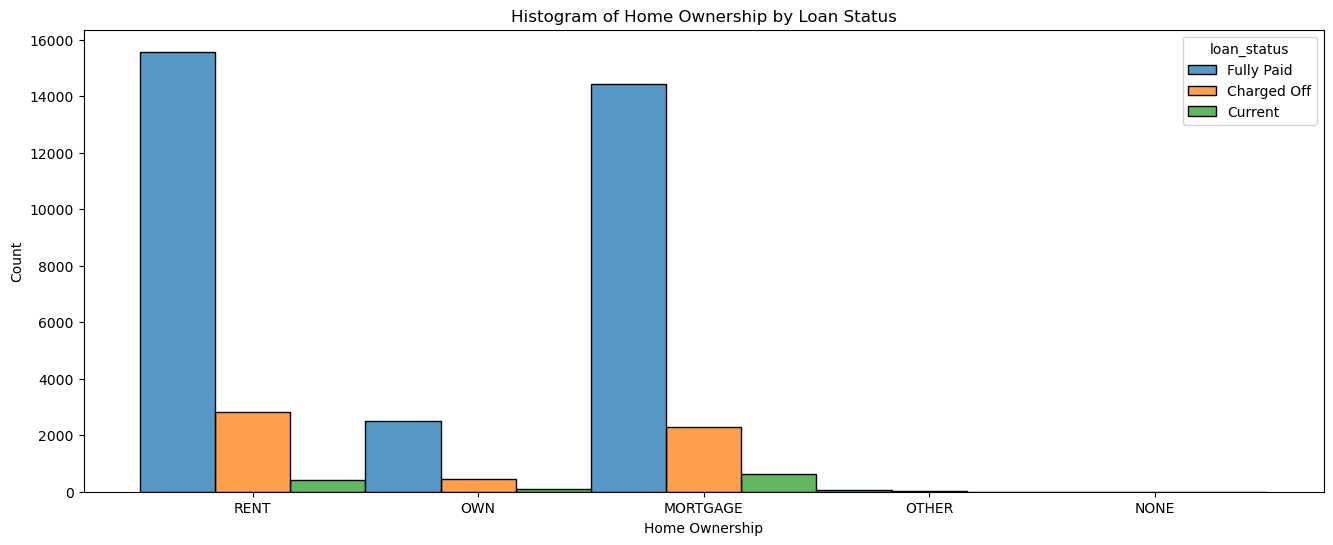

In [42]:
plt.figure(figsize=(16,6))
colors = sns.color_palette("bright") 
sns.histplot(data=loan, x='home_ownership', hue='loan_status', multiple='dodge')

# Add labels and title
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Histogram of Home Ownership by Loan Status')

Text(0.5, 1.0, 'Histogram of grade Vs Loan Status')

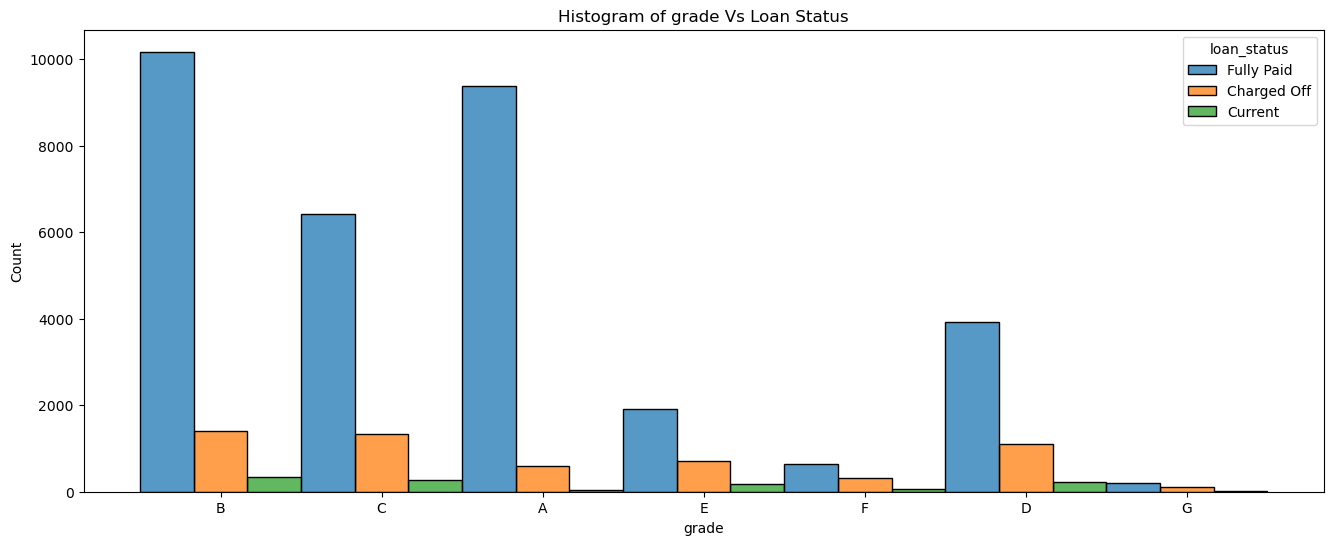

In [43]:
plt.figure(figsize=(16,6))
colors = sns.color_palette("bright") 
sns.histplot(data=loan, x='grade', hue='loan_status', multiple='dodge')

# Add labels and title
plt.xlabel('grade')
plt.ylabel('Count')
plt.title('Histogram of grade Vs Loan Status')

In [44]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,month,year,annual_inc_cat,loan_amnt_cat,int_rate_cat,dti_cat
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,Jan-15,171.62,May-16,0.0,Dec,11,20000-40000,5000-10000,10-15,NaN
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,Apr-13,119.66,Sep-13,0.0,Dec,11,20000-40000,0-5000,15-20,0-5
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,Jun-14,649.91,May-16,0.0,Dec,11,0-20000,0-5000,15-20,5-10
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,Jan-15,357.48,Apr-16,0.0,Dec,11,40000-60000,10000-15000,10-15,20+
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,May-16,67.79,May-16,0.0,Dec,11,80000-100000,0-5000,10-15,15-20


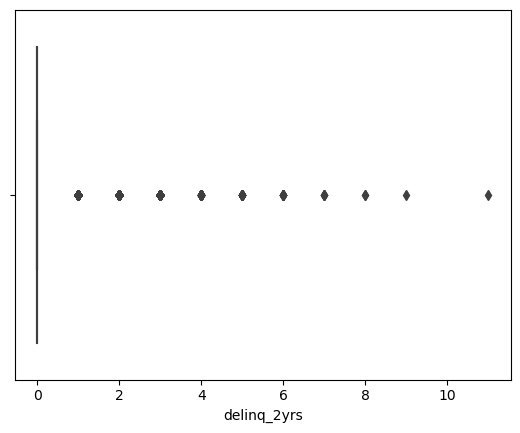

In [45]:
sns.boxplot(x=loan['delinq_2yrs'])
plt.show()

In [46]:
loan['delinq_2yrs'].value_counts()

delinq_2yrs
0     35076
1      3255
2       672
3       216
4        60
5        22
6        10
7         4
8         2
9         1
11        1
Name: count, dtype: int64

##### Observation: Nothing can be concluded from this variable as almost 90% of data is 0 for delinq_2yrs and its charge off is lesser than others. For higher number of delinq_2yrs the data is too low to conclude anything.

# Step 5: Bivarite Analysis using derived metrics

##### As the variables when studies independently, give the same conclusion fpr both Fully Paid loans and Charged Off loans. For eg. Loans with the purpose as 'debt consolidation' are highest for both Fully Paid and Charged Off. Both the types of loan are highest for 36 months term etc. Therefore, to understand the details of Charged off loans, we shall get the ratio of Charged Off loans vs totals loans for the categories. This will give us a better view and understanding of the Charged Off loan customers.

### 1. Creating a pivot table for annual_inc_cat and loan_status

In [47]:
inc_cat_vs_loan_status = pd.pivot_table(data=loan,index=['annual_inc_cat'],columns=['loan_status'],values=['id'],aggfunc='count')
inc_cat_vs_loan_status['Total'] = inc_cat_vs_loan_status['id', 'Charged Off']+inc_cat_vs_loan_status['id', 'Current']+inc_cat_vs_loan_status['id', 'Fully Paid']
inc_cat_vs_loan_status['Charged Off ratio'] = round((inc_cat_vs_loan_status['id', 'Charged Off']/inc_cat_vs_loan_status['Total'])*100,2)

Text(0.5, 1.0, 'Histogram of Annual Income Category Vs Charged Off Ratio')

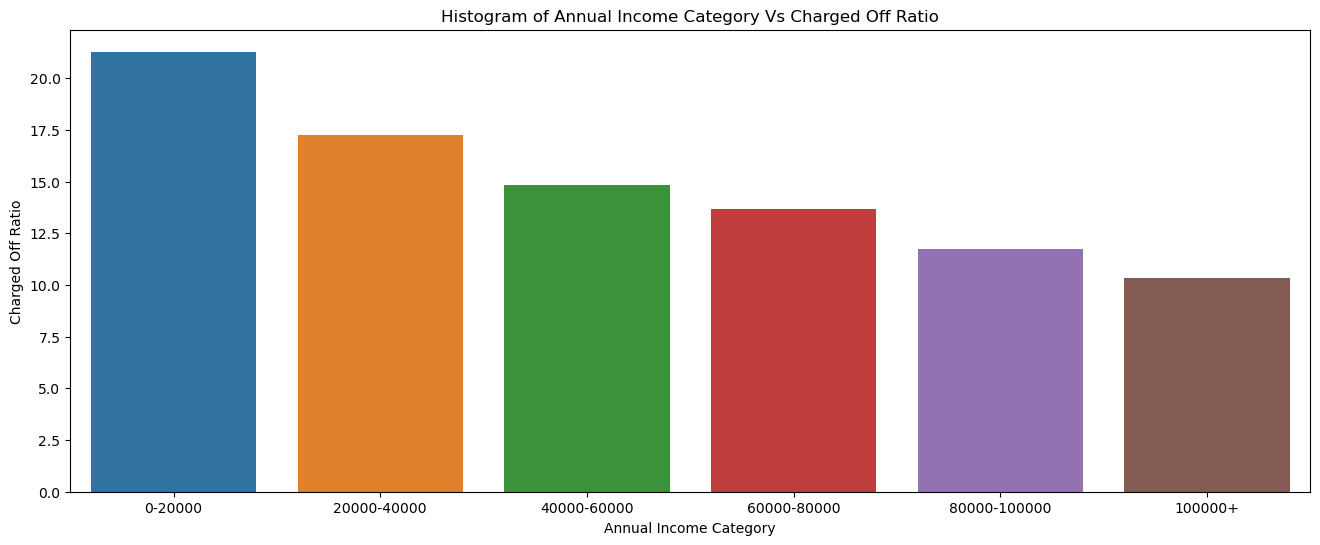

In [48]:
plt.figure(figsize=(16,6))
colors = sns.color_palette("bright")
sns.barplot(x=inc_cat_vs_loan_status.index,y=inc_cat_vs_loan_status['Charged Off ratio'])
#sns.histplot(data=loan, x='grade', )

# Add labels and title
plt.xlabel('Annual Income Category')
plt.ylabel('Charged Off Ratio')
plt.title('Histogram of Annual Income Category Vs Charged Off Ratio')

#### Observation: With the increase in salary, the loan charge off has reduces

### 2. Creating a pivot table for int_rate_cat and loan_status

In [49]:
int_rate_cat_vs_loan_status = pd.pivot_table(data=loan,index=['int_rate_cat'],columns=['loan_status'],values=['id'],aggfunc='count')
int_rate_cat_vs_loan_status['Total'] = int_rate_cat_vs_loan_status['id', 'Charged Off']+int_rate_cat_vs_loan_status['id', 'Current']+int_rate_cat_vs_loan_status['id', 'Fully Paid']
int_rate_cat_vs_loan_status['Charged Off ratio'] = round((int_rate_cat_vs_loan_status['id', 'Charged Off']/int_rate_cat_vs_loan_status['Total'])*100,2)

Text(0.5, 1.0, 'Histogram of Interest Rate Vs Charged Off ratio')

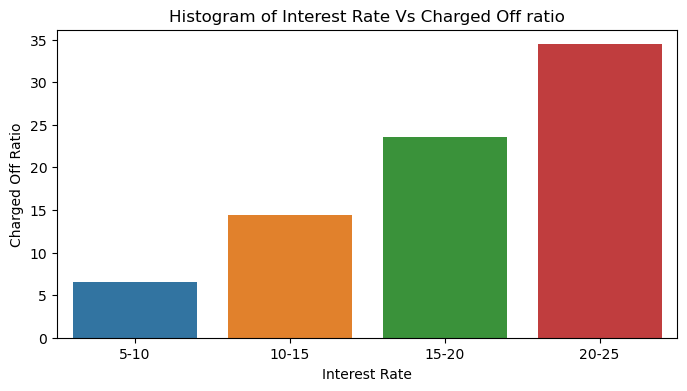

In [50]:
plt.figure(figsize=(8,4))
colors = sns.color_palette("bright")
sns.barplot(x=int_rate_cat_vs_loan_status.index,y=int_rate_cat_vs_loan_status['Charged Off ratio'])

# Add labels and title
plt.xlabel('Interest Rate')
plt.ylabel('Charged Off Ratio')
plt.title('Histogram of Interest Rate Vs Charged Off ratio')

#### Observation: With the increase in interest rate, the loan charge off increases

### 3. Creating a pivot table for dti and loan_status

In [51]:
dti_cat_vs_loan_status = pd.pivot_table(data=loan,index=['dti_cat'],columns=['loan_status'],values=['id'],aggfunc='count')
dti_cat_vs_loan_status['Total'] = dti_cat_vs_loan_status['id', 'Charged Off']+dti_cat_vs_loan_status['id', 'Current']+dti_cat_vs_loan_status['id', 'Fully Paid']
dti_cat_vs_loan_status['Charged Off ratio'] = round((dti_cat_vs_loan_status['id', 'Charged Off']/dti_cat_vs_loan_status['Total'])*100,2)

Text(0.5, 1.0, 'Histogram of dti Vs Charged Off Ratio')

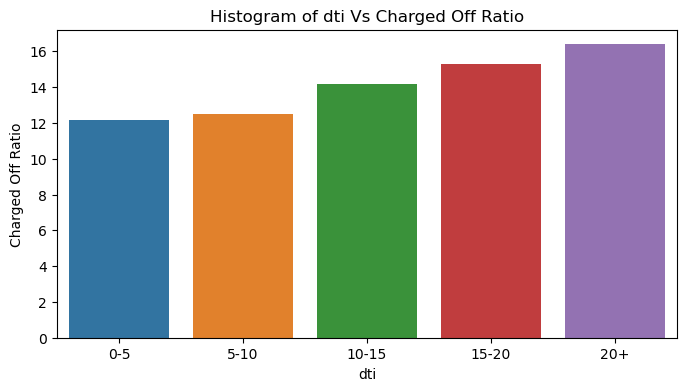

In [52]:
plt.figure(figsize=(8,4))
colors = sns.color_palette("bright")
sns.barplot(x=dti_cat_vs_loan_status.index,y=dti_cat_vs_loan_status['Charged Off ratio'])

# Add labels and title
plt.xlabel('dti')
plt.ylabel('Charged Off Ratio')
plt.title('Histogram of dti Vs Charged Off Ratio')

#### Observation: With increase in dti, the charge off increases

### 4. Creating a pivot table for grade and loan_status

In [53]:
grade_vs_loan_status = pd.pivot_table(data=loan,index=['grade'],columns=['loan_status'],values=['id'],aggfunc='count')
grade_vs_loan_status['Total'] = grade_vs_loan_status['id', 'Charged Off']+grade_vs_loan_status['id', 'Current']+grade_vs_loan_status['id', 'Fully Paid']
grade_vs_loan_status['Charged Off ratio'] = round((grade_vs_loan_status['id', 'Charged Off']/grade_vs_loan_status['Total'])*100,2)

Text(0.5, 1.0, 'Histogram of Grade Vs Charged Off Ratio')

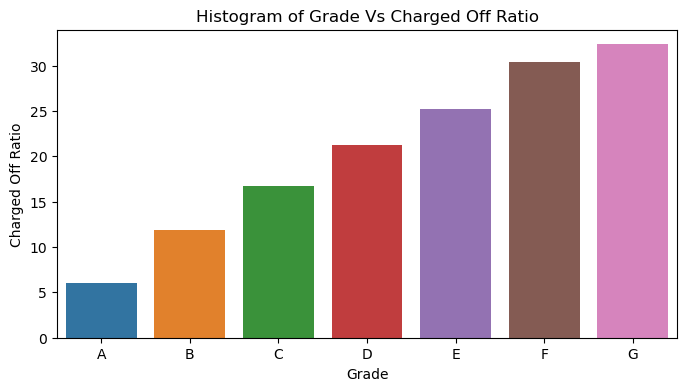

In [54]:
plt.figure(figsize=(8,4))
colors = sns.color_palette("bright")
sns.barplot(x=grade_vs_loan_status.index, y=grade_vs_loan_status['Charged Off ratio'])

# Add labels and title
plt.xlabel('Grade')
plt.ylabel('Charged Off Ratio')
plt.title('Histogram of Grade Vs Charged Off Ratio')

#### Observation: The charge off keeps increasing as we move from Grade A to G

### 5. Creating a pivot table for emp_length and loan_status

In [55]:
emp_len_vs_loan_status = pd.pivot_table(data=loan,index=['emp_length'],columns=['loan_status'],values=['id'],aggfunc='count')
emp_len_vs_loan_status['Total'] = emp_len_vs_loan_status['id', 'Charged Off']+emp_len_vs_loan_status['id', 'Current']+emp_len_vs_loan_status['id', 'Fully Paid']
emp_len_vs_loan_status['Charged Off ratio'] = round((emp_len_vs_loan_status['id', 'Charged Off']/emp_len_vs_loan_status['Total'])*100,2)
emp_len_vs_loan_status

id                    Total Charged Off ratio
loan_status Charged Off Current Fully Paid                        
emp_length                                                        
1 year              455      69       2689  3213             14.16
10+ years          1316     386       7038  8740             15.06
2 years             561      97       3684  4342             12.92
3 years             551      82       3426  4059             13.57
4 years             456      94       2860  3410             13.37
5 years             456      87       2712  3255             14.01
6 years             305      58       1846  2209             13.81
7 years             262      62       1435  1759             14.89
8 years             203      43       1216  1462             13.89
9 years             157      32       1058  1247             12.59
< 1 year            635      74       3844  4553             13.95

Text(0.5, 1.0, 'Histogram of Employee Length Vs Charged Off Ratio')

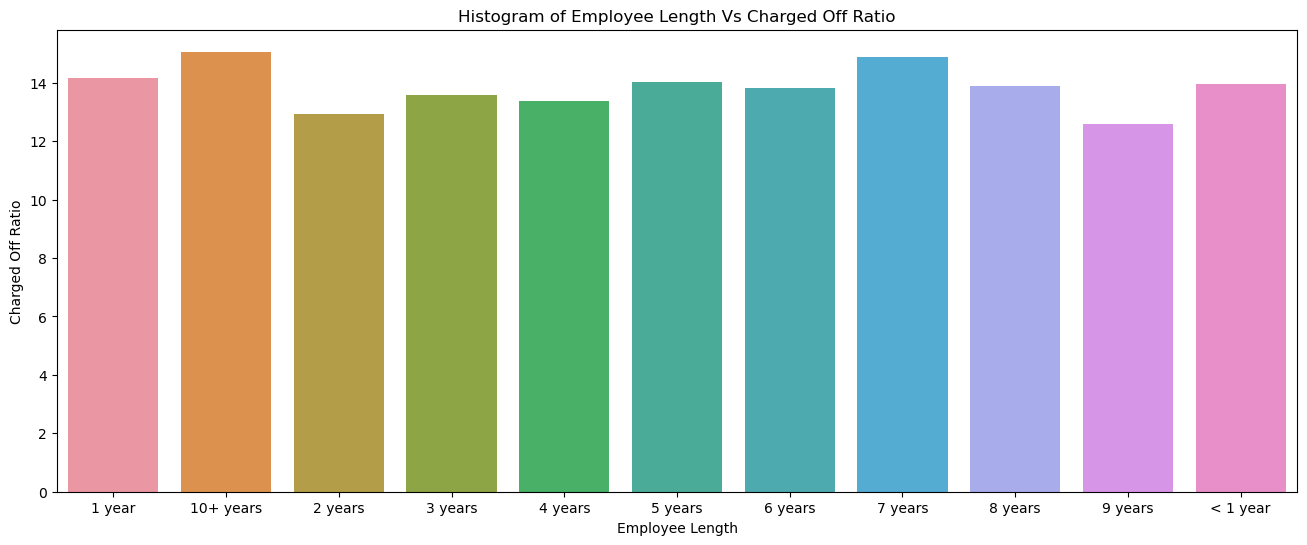

In [56]:
plt.figure(figsize=(16,6))
colors = sns.color_palette("bright")
sns.barplot(x=emp_len_vs_loan_status.index, y=emp_len_vs_loan_status['Charged Off ratio'])

# Add labels and title
plt.xlabel('Employee Length')
plt.ylabel('Charged Off Ratio')
plt.title('Histogram of Employee Length Vs Charged Off Ratio')

#### Observation: Customer with 10+ years of emp_length has the most charged off but there is no significant pattern with emp_length. 

### 6. Creating a pivot table for loan_amnt and loan_status

In [57]:
loan_amnt_vs_loan_status = pd.pivot_table(data=loan,index=['loan_amnt_cat'],columns=['loan_status'],values=['id'],aggfunc='count')
loan_amnt_vs_loan_status['Total'] = loan_amnt_vs_loan_status['id', 'Charged Off']+loan_amnt_vs_loan_status['id', 'Current']+loan_amnt_vs_loan_status['id', 'Fully Paid']
loan_amnt_vs_loan_status['Charged Off ratio'] = round((loan_amnt_vs_loan_status['id', 'Charged Off']/loan_amnt_vs_loan_status['Total'])*100,2)

Text(0.5, 1.0, 'Histogram of Loan Amount Vs Charged Off Ratio')

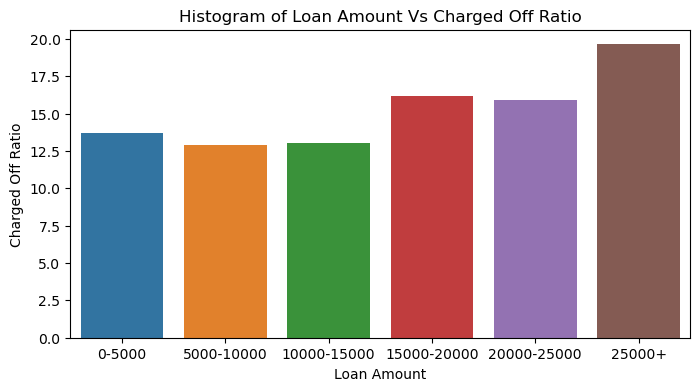

In [58]:
plt.figure(figsize=(8,4))
colors = sns.color_palette("bright")
sns.barplot(x=loan_amnt_vs_loan_status.index, y=loan_amnt_vs_loan_status['Charged Off ratio'])

# Add labels and title
plt.xlabel('Loan Amount')
plt.ylabel('Charged Off Ratio')
plt.title('Histogram of Loan Amount Vs Charged Off Ratio')

#### Observation: Higher charge off with higher loan amnt. Highest charge off ration is for the high loan amount 25,000+

In [59]:
# Deriving the amount of loan that is funded
loan['Funding_pct'] = round((loan['funded_amnt_inv']/loan['loan_amnt'])*100,2)

In [60]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,month,year,annual_inc_cat,loan_amnt_cat,int_rate_cat,dti_cat,Funding_pct
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,171.62,May-16,0.0,Dec,11,20000-40000,5000-10000,10-15,NaN,99.5
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,Dec,11,20000-40000,0-5000,15-20,0-5,100.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,649.91,May-16,0.0,Dec,11,0-20000,0-5000,15-20,5-10,100.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,Dec,11,40000-60000,10000-15000,10-15,20+,100.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,67.79,May-16,0.0,Dec,11,80000-100000,0-5000,10-15,15-20,100.0


In [61]:
loan['Funding_pct'].describe()

count    39319.000000
mean        93.896651
std         17.132045
min          0.000000
25%         98.320000
50%         99.930000
75%        100.000000
max        100.000000
Name: Funding_pct, dtype: float64

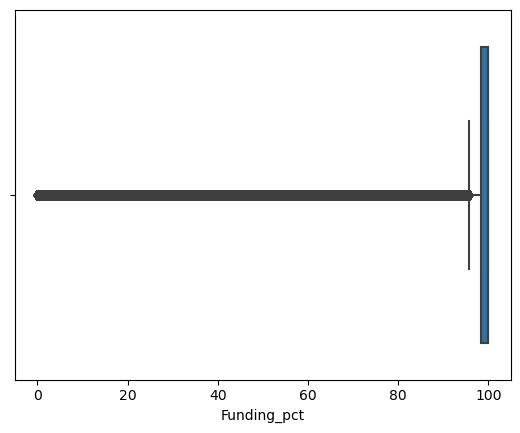

In [62]:
sns.boxplot(x=loan['Funding_pct'])
plt.show()

In [63]:
# Segregating the data based on funding percentage
loan['Funding_pct_cat'] = pd.cut(loan['Funding_pct'], [0, 90, 95, 110], right=False, labels=['<90','90-95','95-100'])

In [64]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,pub_rec_bankruptcies,month,year,annual_inc_cat,loan_amnt_cat,int_rate_cat,dti_cat,Funding_pct,Funding_pct_cat
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,May-16,0.0,Dec,11,20000-40000,5000-10000,10-15,NaN,99.5,95-100
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,Sep-13,0.0,Dec,11,20000-40000,0-5000,15-20,0-5,100.0,95-100
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,May-16,0.0,Dec,11,0-20000,0-5000,15-20,5-10,100.0,95-100
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,Apr-16,0.0,Dec,11,40000-60000,10000-15000,10-15,20+,100.0,95-100
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,May-16,0.0,Dec,11,80000-100000,0-5000,10-15,15-20,100.0,95-100


In [65]:
funding_pct_vs_loan_status = pd.pivot_table(data=loan,index=['Funding_pct_cat'],columns=['loan_status'],values=['id'],aggfunc='count')
funding_pct_vs_loan_status['Total'] = funding_pct_vs_loan_status['id', 'Charged Off']+funding_pct_vs_loan_status['id', 'Current']+funding_pct_vs_loan_status['id', 'Fully Paid']
funding_pct_vs_loan_status['Charged Off ratio'] = round((funding_pct_vs_loan_status['id', 'Charged Off']/funding_pct_vs_loan_status['Total'])*100,2)

In [66]:
funding_pct_vs_loan_status.sort_values('Charged Off ratio', ascending=True)

id                     Total Charged Off ratio
loan_status     Charged Off Current Fully Paid                         
Funding_pct_cat                                                        
95-100                 4508     996      27585  33089             13.62
90-95                   193      35       1180   1408             13.71
<90                     883      95       3844   4822             18.31

Text(0.5, 1.0, 'Histogram of Funding % Vs Charged Off Ratio')

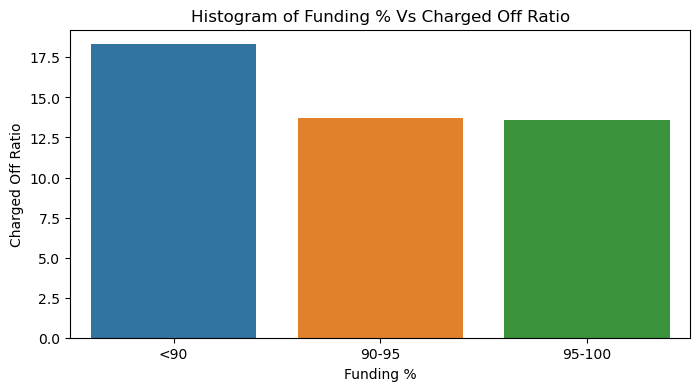

In [67]:
plt.figure(figsize=(8,4))
colors = sns.color_palette("bright")
sns.barplot(x=funding_pct_vs_loan_status.index, y=funding_pct_vs_loan_status['Charged Off ratio'])

# Add labels and title
plt.xlabel('Funding %')
plt.ylabel('Charged Off Ratio')
plt.title('Histogram of Funding % Vs Charged Off Ratio')

#### Observation: loans with lesser funding are more prone to charge off

### 8. Creating pivot for purpose and loan_status

In [68]:
purpose_vs_loan_status = pd.pivot_table(data=loan,index=['purpose'],columns=['loan_status'],values=['id'],aggfunc='count')
purpose_vs_loan_status['id','Current'].fillna(0, inplace=True)
purpose_vs_loan_status['Total'] = purpose_vs_loan_status['id', 'Charged Off']+purpose_vs_loan_status['id', 'Current']+purpose_vs_loan_status['id', 'Fully Paid']
purpose_vs_loan_status['Charged Off ratio'] = round((purpose_vs_loan_status['id', 'Charged Off']/purpose_vs_loan_status['Total'])*100,2)

In [69]:
purpose_vs_loan_status

id                       Total Charged Off ratio
loan_status        Charged Off Current Fully Paid                           
purpose                                                                     
car                      160.0    50.0     1332.0   1542.0             10.38
credit_card              537.0   102.0     4450.0   5089.0             10.55
debt_consolidation      2752.0   580.0    15165.0  18497.0             14.88
educational               55.0     0.0      268.0    323.0             17.03
home_improvement         338.0    97.0     2459.0   2894.0             11.68
house                     58.0    14.0      299.0    371.0             15.63
major_purchase           220.0    37.0     1909.0   2166.0             10.16
medical                  106.0    12.0      568.0    686.0             15.45
moving                    91.0     7.0      479.0    577.0             15.77
other                    629.0   126.0     3203.0   3958.0             15.89
renewable_energy          19.0     1.0       81.0    101.0             18.81
small_business           472.0    74.0     1251.0   1797.0             26.27
vacation                  53.0     6.0      322.0    381.0             13.91
wedding                   94.0    20.0      823.0    937.0             10.03

Text(0.5, 1.0, 'Histogram of Purpose Vs Charged Off Ratio')

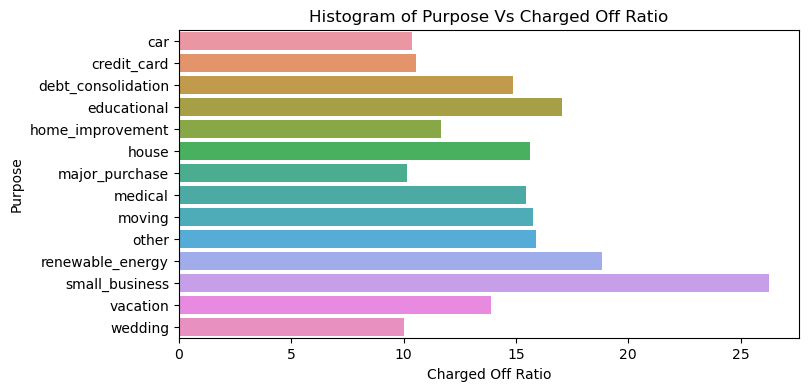

In [70]:
plt.figure(figsize=(8,4))
colors = sns.color_palette("bright")
sns.barplot(x=purpose_vs_loan_status['Charged Off ratio'], y=purpose_vs_loan_status.index)

# Add labels and title
plt.xlabel('Charged Off Ratio')
plt.ylabel('Purpose')
plt.title('Histogram of Purpose Vs Charged Off Ratio')

#### Observation: Small businesses seem to have the highest charge off ratio

### 9. Creating pivot for Home_ownership and loan_status

In [71]:
ownership_vs_loan_status = pd.pivot_table(data=loan,index=['home_ownership'],columns=['loan_status'],values=['id'],aggfunc='count')
ownership_vs_loan_status['Total'] = ownership_vs_loan_status['id', 'Charged Off']+ownership_vs_loan_status['id', 'Current']+ownership_vs_loan_status['id', 'Fully Paid']
ownership_vs_loan_status['Charged Off ratio'] = round((ownership_vs_loan_status['id', 'Charged Off']/ownership_vs_loan_status['Total'])*100,2)

Text(0.5, 1.0, 'Histogram of Home Ownershup Vs Charged Off Ratio')

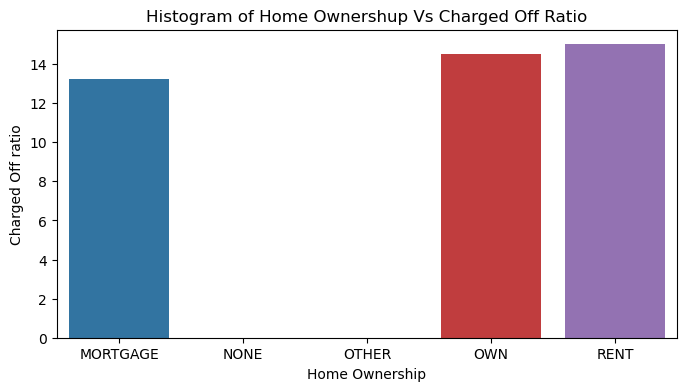

In [72]:
plt.figure(figsize=(8,4))
colors = sns.color_palette("bright")
sns.barplot(x=ownership_vs_loan_status.index, y=ownership_vs_loan_status['Charged Off ratio'])

# Add labels and title
plt.xlabel('Home Ownership')
plt.ylabel('Charged Off ratio')
plt.title('Histogram of Home Ownershup Vs Charged Off Ratio')

### 10. Creating a pivot for state vs loan_status

In [73]:
state_vs_loan_status = pd.pivot_table(data=loan,index=['addr_state'],columns=['loan_status'],values=['id'],aggfunc='count')
state_vs_loan_status['Total'] = state_vs_loan_status['id', 'Charged Off']+state_vs_loan_status['id', 'Current']+state_vs_loan_status['id', 'Fully Paid']
state_vs_loan_status['Charged Off ratio'] = round((state_vs_loan_status['id', 'Charged Off']/state_vs_loan_status['Total'])*100,2)

In [74]:
loan_state = loan[(loan['addr_state']=='IA') & (loan['loan_status']!='Fully Paid')]
loan_state.shape

(0, 44)

In [75]:
state_vs_loan_status['id','Current'].fillna(0, inplace=True)
state_vs_loan_status['id','Charged Off'].fillna(0, inplace=True)

In [76]:
state_vs_loan_status['Total'] = state_vs_loan_status['id', 'Charged Off']+state_vs_loan_status['id', 'Current']+state_vs_loan_status['id', 'Fully Paid']
state_vs_loan_status['Charged Off ratio'] = round((state_vs_loan_status['id', 'Charged Off']/state_vs_loan_status['Total'])*100,2)
state_vs_loan_status.sort_values(by='Total')

id                      Total Charged Off ratio
loan_status Charged Off Current Fully Paid                          
addr_state                                                          
ME                  0.0     0.0        3.0     3.0              0.00
NE                  3.0     0.0        2.0     5.0             60.00
IA                  0.0     0.0        5.0     5.0              0.00
ID                  1.0     0.0        5.0     6.0             16.67
IN                  0.0     0.0        9.0     9.0              0.00
TN                  2.0     0.0       15.0    17.0             11.76
MS                  2.0     0.0       17.0    19.0             10.53
VT                  6.0     1.0       47.0    54.0             11.11
SD                 12.0     2.0       50.0    64.0             18.75
AK                 14.0     2.0       63.0    79.0             17.72
WY                  4.0     3.0       76.0    83.0              4.82
MT                 11.0     2.0       72.0    85.0             12.94
DE                 12.0     1.0      101.0   114.0             10.53
NH                 25.0     5.0      139.0   169.0             14.79
HI                 28.0     8.0      138.0   174.0             16.09
WV                 21.0     5.0      151.0   177.0             11.86
NM                 30.0     5.0      149.0   184.0             16.30
RI                 25.0     4.0      165.0   194.0             12.89
DC                 15.0     3.0      196.0   214.0              7.01
AR                 27.0    10.0      208.0   245.0             11.02
UT                 40.0     6.0      211.0   257.0             15.56
KS                 31.0    16.0      224.0   271.0             11.44
OK                 40.0    12.0      246.0   298.0             13.42
KY                 45.0    13.0      266.0   324.0             13.89
LA                 53.0     9.0      367.0   429.0             12.35
AL                 54.0    17.0      378.0   449.0             12.03
OR                 71.0    16.0      364.0   451.0             15.74
WI                 63.0    20.0      376.0   459.0             13.73
SC                 66.0    13.0      389.0   468.0             14.10
NV                107.0    17.0      368.0   492.0             21.75
MN                 81.0    10.0      522.0   613.0             13.21
MO                114.0    16.0      551.0   681.0             16.74
MI                102.0    16.0      596.0   714.0             14.29
CT                 94.0    24.0      618.0   736.0             12.77
NC                114.0    38.0      629.0   781.0             14.60
CO                 97.0    26.0      659.0   782.0             12.40
WA                127.0    22.0      684.0   833.0             15.25
AZ                121.0    30.0      718.0   869.0             13.92
MD                161.0    26.0      849.0  1036.0             15.54
OH                153.0    44.0     1020.0  1217.0             12.57
MA                156.0    42.0     1123.0  1321.0             11.81
GA                215.0    38.0     1135.0  1388.0             15.49
VA                176.0    38.0     1182.0  1396.0             12.61
IL                196.0    47.0     1262.0  1505.0             13.02
PA                178.0    49.0     1281.0  1508.0             11.80
NJ                277.0    59.0     1490.0  1826.0             15.17
TX                313.0    66.0     2315.0  2694.0             11.62
FL                497.0    85.0     2252.0  2834.0             17.54
NY                488.0   111.0     3156.0  3755.0             13.00
CA               1116.0   149.0     5767.0  7032.0             15.87

Text(0.5, 1.0, 'Histogram of State Vs Charged Off Ratio')

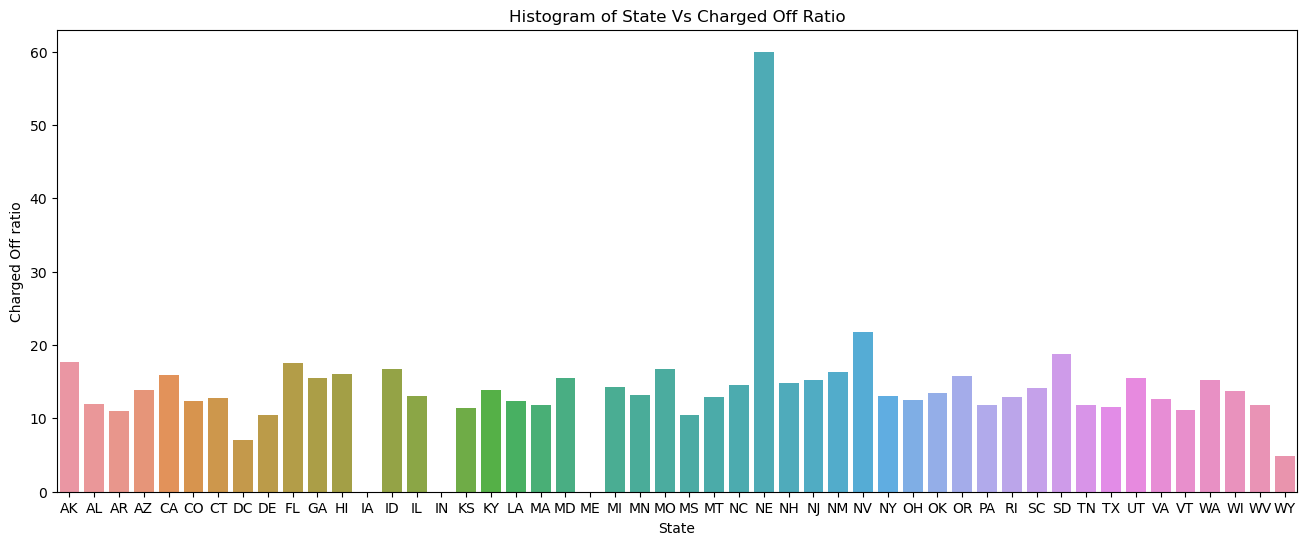

In [77]:
plt.figure(figsize=(16,6))
colors = sns.color_palette("bright")
sns.barplot(x=state_vs_loan_status.index, y=state_vs_loan_status['Charged Off ratio'])

# Add labels and title
plt.xlabel('State')
plt.ylabel('Charged Off ratio')
plt.title('Histogram of State Vs Charged Off Ratio')

#### Observation: NE state seems to have the highest charge off ratio but the number of loan applications are too low to generalize. NJ, GA, MD, CA and FL have good number of loan applicants and charge off is also higher.

### 11. Creating pivot for loan_status and pub_rec_bankrupticies

In [78]:
pub_rec_bank_vs_loan_status = pd.pivot_table(data=loan,index=['pub_rec_bankruptcies'],columns=['loan_status'],values=['id'],aggfunc='count')
pub_rec_bank_vs_loan_status['Total'] = pub_rec_bank_vs_loan_status['id', 'Charged Off']+pub_rec_bank_vs_loan_status['id', 'Current']+pub_rec_bank_vs_loan_status['id', 'Fully Paid']
pub_rec_bank_vs_loan_status['Charged Off ratio'] = round((pub_rec_bank_vs_loan_status['id', 'Charged Off']/pub_rec_bank_vs_loan_status['Total'])*100,2)

Text(0.5, 1.0, 'Histogram of pub rec bankrupticies Vs Charged Off Ratio')

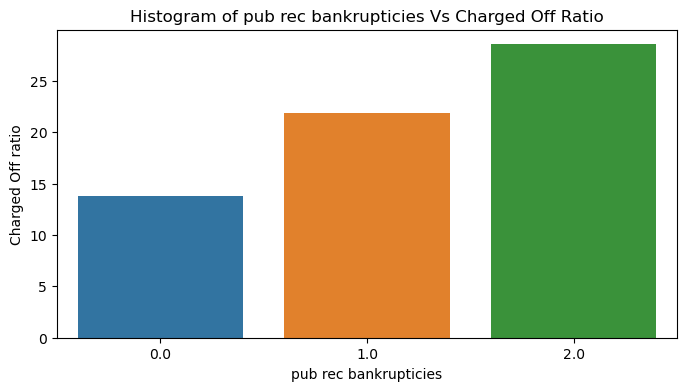

In [79]:
plt.figure(figsize=(8,4))
colors = sns.color_palette("bright")
sns.barplot(x=pub_rec_bank_vs_loan_status.index, y=pub_rec_bank_vs_loan_status['Charged Off ratio'])

# Add labels and title
plt.xlabel('pub rec bankrupticies')
plt.ylabel('Charged Off ratio')
plt.title('Histogram of pub rec bankrupticies Vs Charged Off Ratio')

#### Observation: Charge off increases with higher public record bankruptcies. Data for 2 bankruptcies is very less but we have enough data for 1 bankruptcies where charge off is higher than 0 bankruptcies

### 12. Creating pivot fpor loan_status and verification_status

In [80]:
verify_vs_loan_status = pd.pivot_table(data=loan,index=['verification_status'],columns=['loan_status'],values=['id'],aggfunc='count')
verify_vs_loan_status['Total'] = verify_vs_loan_status['id', 'Charged Off']+verify_vs_loan_status['id', 'Current']+verify_vs_loan_status['id', 'Fully Paid']
verify_vs_loan_status['Charged Off ratio'] = round((verify_vs_loan_status['id', 'Charged Off']/verify_vs_loan_status['Total'])*100,2)

Text(0.5, 1.0, 'Histogram of Verification Status Vs Charged Off Ratio')

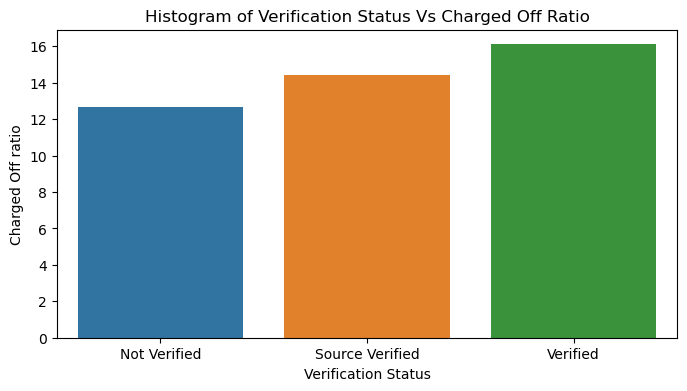

In [81]:
plt.figure(figsize=(8,4))
colors = sns.color_palette("bright")
sns.barplot(x=verify_vs_loan_status.index, y=verify_vs_loan_status['Charged Off ratio'])

# Add labels and title
plt.xlabel('Verification Status')
plt.ylabel('Charged Off ratio')
plt.title('Histogram of Verification Status Vs Charged Off Ratio')

#### Observation: Difficult to conclude anything related to verification status

### 13. Creating pivot for delinq_2yrs and loan_status

In [82]:
delinq_vs_loan_status = pd.pivot_table(data=loan,index=['delinq_2yrs'],columns=['loan_status'],values=['id'],aggfunc='count')
delinq_vs_loan_status['Total'] = delinq_vs_loan_status['id', 'Charged Off']+delinq_vs_loan_status['id', 'Current']+delinq_vs_loan_status['id', 'Fully Paid']
delinq_vs_loan_status['Charged Off ratio'] = round((delinq_vs_loan_status['id', 'Charged Off']/delinq_vs_loan_status['Total'])*100,2)

In [83]:
delinq_vs_loan_status['id','Charged Off'].fillna(0,inplace=True)
delinq_vs_loan_status['id','Current'].fillna(0,inplace=True)

In [84]:
delinq_vs_loan_status['Total'] = delinq_vs_loan_status['id', 'Charged Off']+delinq_vs_loan_status['id', 'Current']+delinq_vs_loan_status['id', 'Fully Paid']
delinq_vs_loan_status['Charged Off ratio'] = round((delinq_vs_loan_status['id', 'Charged Off']/delinq_vs_loan_status['Total'])*100,2)

Text(0.5, 1.0, 'Histogram of delinq_2yrs Vs Charged Off Ratio')

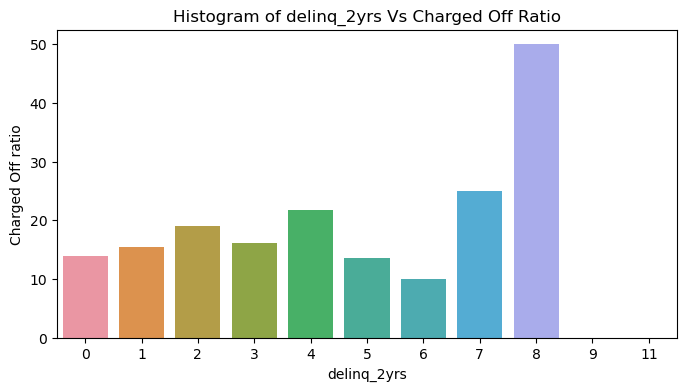

In [85]:
plt.figure(figsize=(8,4))
colors = sns.color_palette("bright")
sns.barplot(x=delinq_vs_loan_status.index, y=delinq_vs_loan_status['Charged Off ratio'],)

# Add labels and title
plt.xlabel('delinq_2yrs')
plt.ylabel('Charged Off ratio')
plt.title('Histogram of delinq_2yrs Vs Charged Off Ratio')

# Step 6: Multi variate Analysis

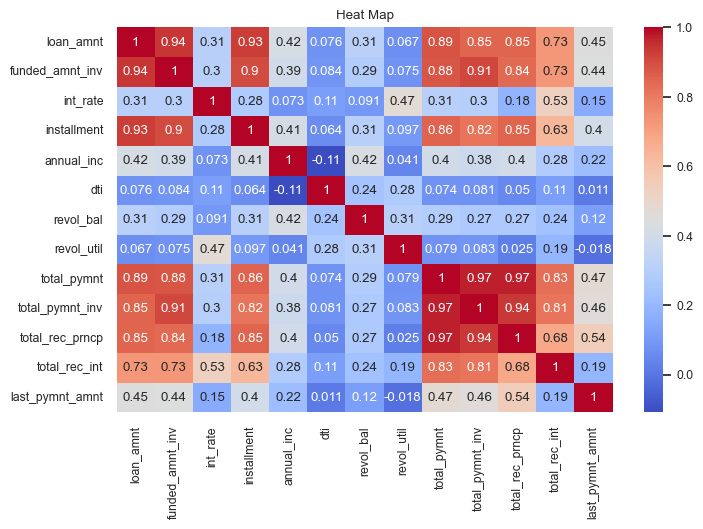

In [86]:
plt.figure(figsize=(8,5))
sns.set(font_scale = 0.8)
mask = np.triu(np.ones_like(loan[num_cols].corr(), dtype=bool))
sns.heatmap(loan[num_cols].corr(),annot=True , cmap='coolwarm')
plt.title('Heat Map')
plt.show()

##### 1. There is a very strong realtionship between loan_amnt, funded_amnt_inv, installment, total_pymnt, total_pymnt_inv, total_rec_prncp and total_rec_int
##### 2. Other variables do not show high amount of correlation